# How Much to Charge for Real Estate - Linear Regression Analysis and Model

## Objective 1 - Interpretability:
To build simple linear regresssion equations with a few variables (originally 81 variables) to generate insights. In other words, the focus will be on the coefficients.
    
## Objective 2 - Prediction:
To build a model with high predictive capacity, with multiple variables, focusing on a good performance, and ready to be used on a website as a price calculator. Notice that, for a good usability from the customer, it is important to have the lowest possible error.

In [1]:
%reload_ext nb_black
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

<IPython.core.display.Javascript object>

#### Let's call our database csv file, and check the first and last rows.

In [2]:
data = pd.read_csv("base.csv")
pd.set_option("display.max_columns", None)
data.head()

Id  ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua Beco FormaProp  \
0   1            60         RL     65.0         8450  Pave  NaN       Reg   
1   2            20         RL     80.0         9600  Pave  NaN       Reg   
2   3            60         RL     68.0        11250  Pave  NaN       IR1   
3   4            70         RL     60.0         9550  Pave  NaN       IR1   
4   5            60         RL     84.0        14260  Pave  NaN       IR1   

  PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1 Estrada2  \
0       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm   
1       Lvl   AllPub        FR2            Gtl  Veenker    Feedr     Norm   
2       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm   
3       Lvl   AllPub     Corner            Gtl  Crawfor     Norm     Norm   
4       Lvl   AllPub        FR2            Gtl  NoRidge     Norm     Norm   

  TipoHabitacao EstiloHabitacao  Qualidade  Condicao  AnoConstrucao  \
0          1Fam          2Story          7         5           2003   
1          1Fam          1Story          6         8           1976   
2          1Fam          2Story          7         5           2001   
3          1Fam          2Story          7         5           1915   
4          1Fam          2Story          8         5           2000   

   AnoReforma TipoTelhado MaterialTelhado Exterior1 Exterior2 TipoAlvenaria  \
0        2003       Gable         CompShg   VinylSd   VinylSd       BrkFace   
1        1976       Gable         CompShg   MetalSd   MetalSd          None   
2        2002       Gable         CompShg   VinylSd   VinylSd       BrkFace   
3        1970       Gable         CompShg   Wd Sdng   Wd Shng          None   
4        2000       Gable         CompShg   VinylSd   VinylSd       BrkFace   

   AreaAlvenaria QualidadeCobertura CondicaoExterna TipoFundacao AlturaPorao  \
0          196.0                 Gd              TA        PConc          Gd   
1            0.0                 TA              TA       CBlock          Gd   
2          162.0                 Gd              TA        PConc          Gd   
3            0.0                 TA              TA       BrkTil          TA   
4          350.0                 Gd              TA        PConc          Gd   

  CondicaoPorao ParedePorao TipoAcabPorao1  AreaAcabPorao1 TipoAcabPorao2  \
0            TA          No            GLQ             706            Unf   
1            TA          Gd            ALQ             978            Unf   
2            TA          Mn            GLQ             486            Unf   
3            Gd          No            ALQ             216            Unf   
4            TA          Av            GLQ             655            Unf   

   AreaAcabPorao2  AreaInacabPorao  AreaPorao Aquecimento  \
0               0              150        856        GasA   
1               0              284       1262        GasA   
2               0              434        920        GasA   
3               0              540        756        GasA   
4               0              490       1145        GasA   

  QualidadeAquecimento ArCentral InstalacaoEletrica  AreaTerreo  Area2Andar  \
0                   Ex         Y              SBrkr         856         854   
1                   Ex         Y              SBrkr        1262           0   
2                   Ex         Y              SBrkr         920         866   
3                   Gd         Y              SBrkr         961         756   
4                   Ex         Y              SBrkr        1145        1053   

   BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  Banheiro  \
0                   0            1710              1            0         2   
1                   0            1262              0            1         2   
2                   0            1786              1            0         2   
3                   0            1717              1            0        

<IPython.core.display.Javascript object>

In [3]:
data.tail()

Id  ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua Beco  \
1455  1456            60         RL     62.0         7917  Pave  NaN   
1456  1457            20         RL     85.0        13175  Pave  NaN   
1457  1458            70         RL     66.0         9042  Pave  NaN   
1458  1459            20         RL     68.0         9717  Pave  NaN   
1459  1460            20         RL     75.0         9937  Pave  NaN   

     FormaProp PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1  \
1455       Reg       Lvl   AllPub     Inside            Gtl  Gilbert     Norm   
1456       Reg       Lvl   AllPub     Inside            Gtl   NWAmes     Norm   
1457       Reg       Lvl   AllPub     Inside            Gtl  Crawfor     Norm   
1458       Reg       Lvl   AllPub     Inside            Gtl    NAmes     Norm   
1459       Reg       Lvl   AllPub     Inside            Gtl  Edwards     Norm   

     Estrada2 TipoHabitacao EstiloHabitacao  Qualidade  Condicao  \
1455     Norm          1Fam          2Story          6         5   
1456     Norm          1Fam          1Story          6         6   
1457     Norm          1Fam          2Story          7         9   
1458     Norm          1Fam          1Story          5         6   
1459     Norm          1Fam          1Story          5         6   

      AnoConstrucao  AnoReforma TipoTelhado MaterialTelhado Exterior1  \
1455           1999        2000       Gable         CompShg   VinylSd   
1456           1978        1988       Gable         CompShg   Plywood   
1457           1941        2006       Gable         CompShg   CemntBd   
1458           1950        1996         Hip         CompShg   MetalSd   
1459           1965        1965       Gable         CompShg   HdBoard   

     Exterior2 TipoAlvenaria  AreaAlvenaria QualidadeCobertura  \
1455   VinylSd          None            0.0                 TA   
1456   Plywood         Stone          119.0                 TA   
1457   CmentBd          None            0.0                 Ex   
1458   MetalSd          None            0.0                 TA   
1459   HdBoard          None            0.0                 Gd   

     CondicaoExterna TipoFundacao AlturaPorao CondicaoPorao ParedePorao  \
1455              TA        PConc          Gd            TA          No   
1456              TA       CBlock          Gd            TA          No   
1457              Gd        Stone          TA            Gd          No   
1458              TA       CBlock          TA            TA          Mn   
1459              TA       CBlock          TA            TA          No   

     TipoAcabPorao1  AreaAcabPorao1 TipoAcabPorao2  AreaAcabPorao2  \
1455            Unf               0            Unf               0   
1456            ALQ             790            Rec             163   
1457            GLQ             275            Unf               0   
1458            GLQ              49            Rec            1029   
1459            BLQ             830            LwQ             290   

      AreaInacabPorao  AreaPorao Aquecimento QualidadeAquecimento ArCentral  \
1455              953        953        GasA                   Ex         Y   
1456              589       1542        GasA                   TA         Y   
1457              877       1152        GasA                   Ex         Y   
1458                0       1078        GasA                   Gd         Y   
1459              136       1256        GasA                   Gd         Y   

     InstalacaoEletrica  AreaTerreo  Area2Andar  BaixaQualiAreaAcab  \
1455              SBrkr         953         694                   0   
1456              SBrkr        2073           0                   0   
1457              SBrkr        1188        1152                   0   
1458              FuseA        1078           0                   0   
1459              SBrkr        1256           0                   0   

      AreaConstruida  BanheiroPorao  LavaboPorao  Banheiro  Lavabo  \

<IPython.core.display.Javascript object>

#### Let's check the types of data we have in our columns, and make necessary changes in it.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

<IPython.core.display.Javascript object>

Now it is possible to identify and change variables to their right types.

In [5]:
data.ClasseImovel = data.ClasseImovel.astype("category")
data.ClasseZona = data.ClasseZona.astype("category")
data.Rua = data.Rua.astype("category")
data.Beco = data.Beco.astype("category")
data.FormaProp = data.FormaProp.astype("category")
data.PlanoProp = data.PlanoProp.astype("category")
data.Servicos = data.Servicos.astype("category")
data.ConfigLote = data.ConfigLote.astype("category")
data.InclinacaoLote = data.InclinacaoLote.astype("category")
data.Bairro = data.Bairro.astype("category")
data.Estrada1 = data.Estrada1.astype("category")
data.Estrada2 = data.Estrada2.astype("category")
data.TipoHabitacao = data.TipoHabitacao.astype("category")
data.EstiloHabitacao = data.EstiloHabitacao.astype("category")
data.Qualidade = data.Qualidade.astype("category")
data.Condicao = data.Condicao.astype("category")
data.TipoTelhado = data.TipoTelhado.astype("category")
data.MaterialTelhado = data.MaterialTelhado.astype("category")
data.Exterior1 = data.Exterior1.astype("category")
data.Exterior2 = data.Exterior2.astype("category")
data.TipoAlvenaria = data.TipoAlvenaria.astype("category")
data.QualidadeCobertura = data.QualidadeCobertura.astype("category")
data.CondicaoExterna = data.CondicaoExterna.astype("category")
data.TipoFundacao = data.TipoFundacao.astype("category")
data.AlturaPorao = data.AlturaPorao.astype("category")
data.CondicaoPorao = data.CondicaoPorao.astype("category")
data.ParedePorao = data.ParedePorao.astype("category")
data.TipoAcabPorao1 = data.TipoAcabPorao1.astype("category")
data.TipoAcabPorao2 = data.TipoAcabPorao2.astype("category")
data.Aquecimento = data.Aquecimento.astype("category")
data.QualidadeAquecimento = data.QualidadeAquecimento.astype("category")
data.ArCentral = data.ArCentral.astype("category")
data.InstalacaoEletrica = data.InstalacaoEletrica.astype("category")
data.QualidadeCozinha = data.QualidadeCozinha.astype("category")
data.Funcionalidade = data.Funcionalidade.astype("category")
data.QualdiadeLareira = data.QualdiadeLareira.astype("category")
data.LocalGaragem = data.LocalGaragem.astype("category")
data.AcabamentoGaragem = data.AcabamentoGaragem.astype("category")
data.QualidadeGaragem = data.QualidadeGaragem.astype("category")
data.CondicaoGaragem = data.CondicaoGaragem.astype("category")
data.EntradaPavimentada = data.EntradaPavimentada.astype("category")
data.QualidadePiscina = data.QualidadePiscina.astype("category")
data.QualidadeCerca = data.QualidadeCerca.astype("category")
data.Outros = data.Outros.astype("category")
data.TipoVenda = data.TipoVenda.astype("category")
data.CondicaoVenda = data.CondicaoVenda.astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Id                    1460 non-null   int64   
 1   ClasseImovel          1460 non-null   category
 2   ClasseZona            1460 non-null   category
 3   Fachada               1201 non-null   float64 
 4   TamanhoLote           1460 non-null   int64   
 5   Rua                   1460 non-null   category
 6   Beco                  91 non-null     category
 7   FormaProp             1460 non-null   category
 8   PlanoProp             1460 non-null   category
 9   Servicos              1460 non-null   category
 10  ConfigLote            1460 non-null   category
 11  InclinacaoLote        1460 non-null   category
 12  Bairro                1460 non-null   category
 13  Estrada1              1460 non-null   category
 14  Estrada2              1460 non-null   category
 15  Tipo

<IPython.core.display.Javascript object>

#### Verifying the percentage of null data.

In [6]:
null_percentage = dict(data.isnull().mean().round(4) * 100)
null_percentage

{'Id': 0.0,
 'ClasseImovel': 0.0,
 'ClasseZona': 0.0,
 'Fachada': 17.740000000000002,
 'TamanhoLote': 0.0,
 'Rua': 0.0,
 'Beco': 93.77,
 'FormaProp': 0.0,
 'PlanoProp': 0.0,
 'Servicos': 0.0,
 'ConfigLote': 0.0,
 'InclinacaoLote': 0.0,
 'Bairro': 0.0,
 'Estrada1': 0.0,
 'Estrada2': 0.0,
 'TipoHabitacao': 0.0,
 'EstiloHabitacao': 0.0,
 'Qualidade': 0.0,
 'Condicao': 0.0,
 'AnoConstrucao': 0.0,
 'AnoReforma': 0.0,
 'TipoTelhado': 0.0,
 'MaterialTelhado': 0.0,
 'Exterior1': 0.0,
 'Exterior2': 0.0,
 'TipoAlvenaria': 0.5499999999999999,
 'AreaAlvenaria': 0.5499999999999999,
 'QualidadeCobertura': 0.0,
 'CondicaoExterna': 0.0,
 'TipoFundacao': 0.0,
 'AlturaPorao': 2.53,
 'CondicaoPorao': 2.53,
 'ParedePorao': 2.6,
 'TipoAcabPorao1': 2.53,
 'AreaAcabPorao1': 0.0,
 'TipoAcabPorao2': 2.6,
 'AreaAcabPorao2': 0.0,
 'AreaInacabPorao': 0.0,
 'AreaPorao': 0.0,
 'Aquecimento': 0.0,
 'QualidadeAquecimento': 0.0,
 'ArCentral': 0.0,
 'InstalacaoEletrica': 0.06999999999999999,
 'AreaTerreo': 0.0,
 'Area2

<IPython.core.display.Javascript object>

<AxesSubplot:>

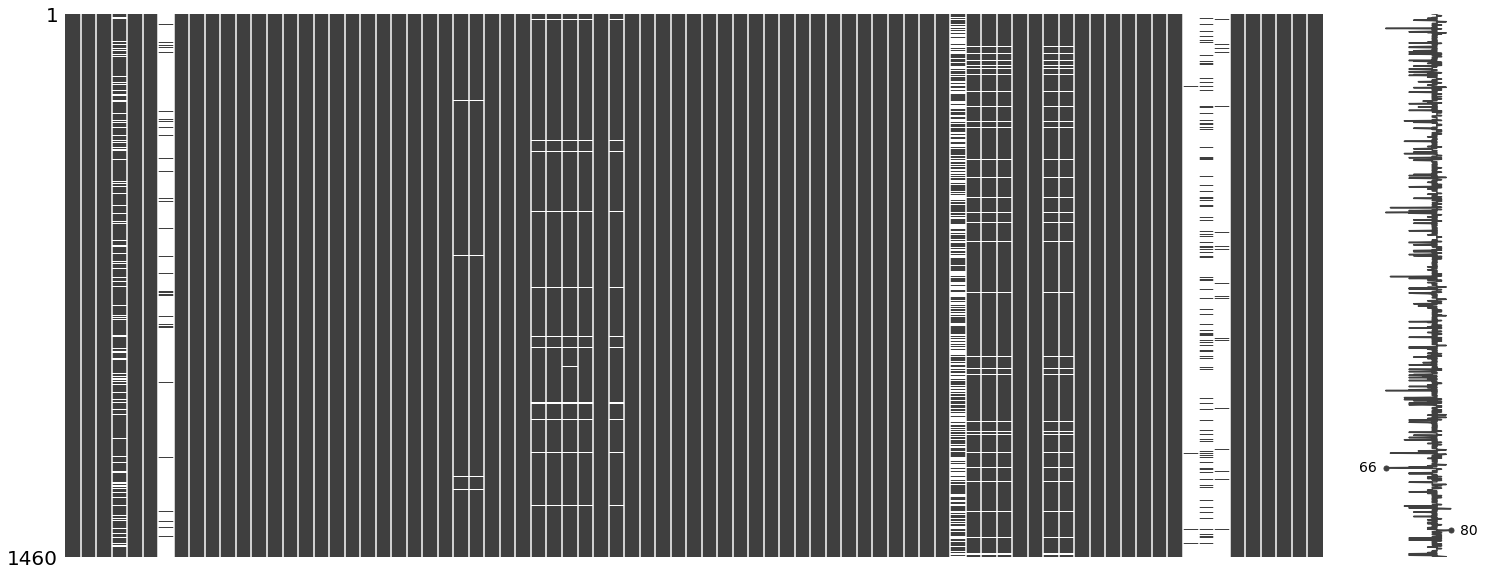

<IPython.core.display.Javascript object>

In [7]:
# The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.
import missingno as msno

msno.matrix(data)

## Numeric Variables Cleaning and Treatment

#### For the float and intenger type columns let's analyze their distribution to choose the best replacement for the missing data.

It is good to check the target distribution firstly.

In [8]:
import plotly.express as px

fig = px.histogram(data["PrecoVenda"], x="PrecoVenda")
fig.show()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='PrecoVenda', ylabel='Frequency'>

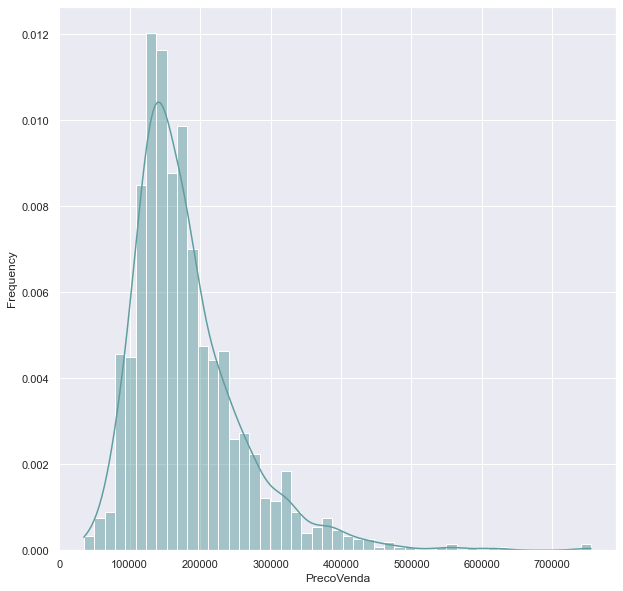

<IPython.core.display.Javascript object>

In [9]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.histplot(
    data["PrecoVenda"],
    label="Response Variable",
    stat="frequency",
    color="cadetblue",
    kde=True,
)

<AxesSubplot:xlabel='PrecoVenda'>

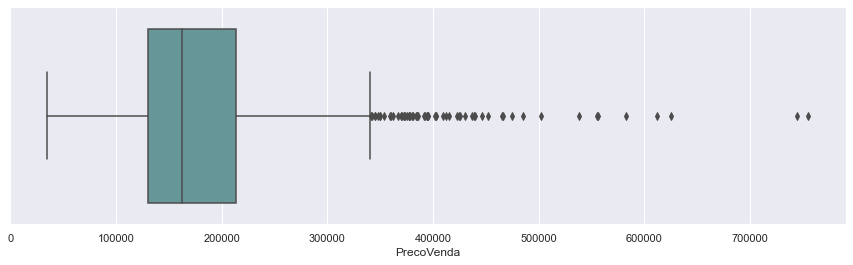

<IPython.core.display.Javascript object>

In [10]:
sns.set(rc={"figure.figsize": (15, 4)})
target = pd.DataFrame(data["PrecoVenda"])
sns.boxplot(x="PrecoVenda", data=target, color="cadetblue")

In [11]:
fig = px.box(data["PrecoVenda"])
fig.show()

<IPython.core.display.Javascript object>

#### It is important to have a normal distribution in our target variable, so we can change it to a log scale.

In [12]:
# We can change the scale of varible target before transforming it.
data["PrecoVenda"] = data["PrecoVenda"] / 1000
data["PrecoVenda"]

0       208.500
1       181.500
2       223.500
3       140.000
4       250.000
         ...   
1455    175.000
1456    210.000
1457    266.500
1458    142.125
1459    147.500
Name: PrecoVenda, Length: 1460, dtype: float64

<IPython.core.display.Javascript object>

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='log_PrecoVenda', ylabel='Density'>

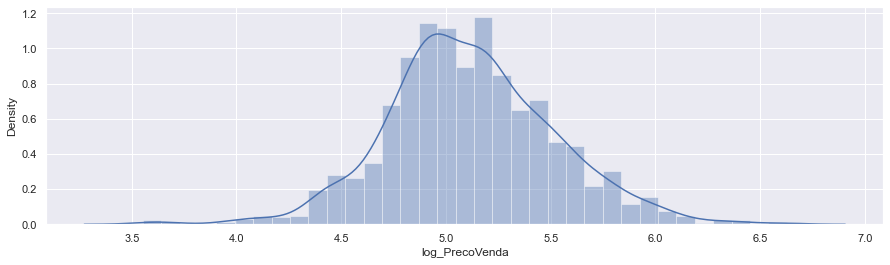

<IPython.core.display.Javascript object>

In [13]:
from scipy.stats import norm

data["log_PrecoVenda"] = np.log(data["PrecoVenda"])

sns.distplot(data["log_PrecoVenda"])

Despite already having shown a normal distribution with log method, let's try another option transforming it to a z-score scale.

In [14]:
import scipy.stats as stats

data["z_PrecoVenda"] = stats.zscore(data["PrecoVenda"])
data.head()

Id ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua Beco FormaProp  \
0   1           60         RL     65.0         8450  Pave  NaN       Reg   
1   2           20         RL     80.0         9600  Pave  NaN       Reg   
2   3           60         RL     68.0        11250  Pave  NaN       IR1   
3   4           70         RL     60.0         9550  Pave  NaN       IR1   
4   5           60         RL     84.0        14260  Pave  NaN       IR1   

  PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1 Estrada2  \
0       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm   
1       Lvl   AllPub        FR2            Gtl  Veenker    Feedr     Norm   
2       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm   
3       Lvl   AllPub     Corner            Gtl  Crawfor     Norm     Norm   
4       Lvl   AllPub        FR2            Gtl  NoRidge     Norm     Norm   

  TipoHabitacao EstiloHabitacao Qualidade Condicao  AnoConstrucao  AnoReforma  \
0          1Fam          2Story         7        5           2003        2003   
1          1Fam          1Story         6        8           1976        1976   
2          1Fam          2Story         7        5           2001        2002   
3          1Fam          2Story         7        5           1915        1970   
4          1Fam          2Story         8        5           2000        2000   

  TipoTelhado MaterialTelhado Exterior1 Exterior2 TipoAlvenaria  \
0       Gable         CompShg   VinylSd   VinylSd       BrkFace   
1       Gable         CompShg   MetalSd   MetalSd          None   
2       Gable         CompShg   VinylSd   VinylSd       BrkFace   
3       Gable         CompShg   Wd Sdng   Wd Shng          None   
4       Gable         CompShg   VinylSd   VinylSd       BrkFace   

   AreaAlvenaria QualidadeCobertura CondicaoExterna TipoFundacao AlturaPorao  \
0          196.0                 Gd              TA        PConc          Gd   
1            0.0                 TA              TA       CBlock          Gd   
2          162.0                 Gd              TA        PConc          Gd   
3            0.0                 TA              TA       BrkTil          TA   
4          350.0                 Gd              TA        PConc          Gd   

  CondicaoPorao ParedePorao TipoAcabPorao1  AreaAcabPorao1 TipoAcabPorao2  \
0            TA          No            GLQ             706            Unf   
1            TA          Gd            ALQ             978            Unf   
2            TA          Mn            GLQ             486            Unf   
3            Gd          No            ALQ             216            Unf   
4            TA          Av            GLQ             655            Unf   

   AreaAcabPorao2  AreaInacabPorao  AreaPorao Aquecimento  \
0               0              150        856        GasA   
1               0              284       1262        GasA   
2               0              434        920        GasA   
3               0              540        756        GasA   
4               0              490       1145        GasA   

  QualidadeAquecimento ArCentral InstalacaoEletrica  AreaTerreo  Area2Andar  \
0                   Ex         Y              SBrkr         856         854   
1                   Ex         Y              SBrkr        1262           0   
2                   Ex         Y              SBrkr         920         866   
3                   Gd         Y              SBrkr         961         756   
4                   Ex         Y              SBrkr        1145        1053   

   BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  Banheiro  \
0                   0            1710              1            0         2   
1                   0            1262              0            1         2   
2                   0            1786              1            0         2   
3                   0            1717              1            0         1   
4           

<IPython.core.display.Javascript object>

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='z_PrecoVenda', ylabel='Density'>

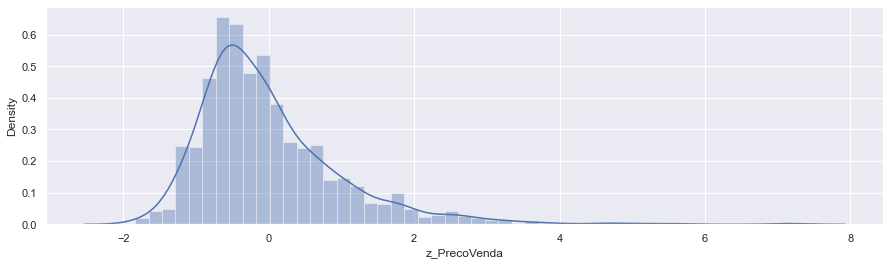

<IPython.core.display.Javascript object>

In [15]:
sns.distplot(data["z_PrecoVenda"])

#### The chosen transformation is the log for the variable target.

#### Next, verify the correlations between the numerical variables, and then filling the missing data,.

In [16]:
df_num = data.select_dtypes(include=["int64", "float64"])
df_num.describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99]).round(2)

Id  Fachada  TamanhoLote  AnoConstrucao  AnoReforma  \
count  1460.00  1201.00      1460.00        1460.00     1460.00   
mean    730.50    70.05     10516.83        1971.27     1984.87   
std     421.61    24.28      9981.26          30.20       20.65   
min       1.00    21.00      1300.00        1872.00     1950.00   
25%     365.75    59.00      7553.50        1954.00     1967.00   
50%     730.50    69.00      9478.50        1973.00     1994.00   
75%    1095.25    80.00     11601.50        2000.00     2004.00   
95%    1387.05   107.00     17401.15        2007.00     2007.00   
99%    1445.41   141.00     37567.64        2009.00     2009.00   
max    1460.00   313.00    215245.00        2010.00     2010.00   

       AreaAlvenaria  AreaAcabPorao1  AreaAcabPorao2  AreaInacabPorao  \
count        1452.00         1460.00         1460.00          1460.00   
mean          103.69          443.64           46.55           567.24   
std           181.07          456.10          161.32           441.87   
min             0.00            0.00            0.00             0.00   
25%             0.00            0.00            0.00           223.00   
50%             0.00          383.50            0.00           477.50   
75%           166.00          712.25            0.00           808.00   
95%           456.00         1274.00          396.20          1468.00   
99%           791.92         1572.41          830.38          1797.05   
max          1600.00         5644.00         1474.00          2336.00   

       AreaPorao  AreaTerreo  Area2Andar  BaixaQualiAreaAcab  AreaConstruida  \
count    1460.00     1460.00     1460.00             1460.00         1460.00   
mean     1057.43     1162.63      346.99                5.84         1515.46   
std       438.71      386.59      436.53               48.62          525.48   
min         0.00      334.00        0.00                0.00          334.00   
25%       795.75      882.00        0.00                0.00         1129.50   
50%       991.50     1087.00        0.00                0.00         1464.00   
75%      1298.25     1391.25      728.00                0.00         1776.75   
95%      1753.00     1831.25     1141.05                0.00         2466.10   
99%      2155.05     2219.46     1418.92              360.00         3123.48   
max      6110.00     4692.00     2065.00              572.00         5642.00   

       BanheiroPorao  LavaboPorao  Banheiro   Lavabo  BedroomAbvGr  \
count        1460.00      1460.00   1460.00  1460.00       1460.00   
mean            0.43         0.06      1.57     0.38          2.87   
std             0.52         0.24      0.55     0.50          0.82   
min             0.00         0.00      0.00     0.00          0.00   
25%             0.00         0.00      1.00     0.00          2.00   
50%             0.00         0.00      2.00     0.00          3.00   
75%             1.00         0.00      2.00     1.00          3.00   
95%             1.00         1.00      2.00     1.00          4.00   
99%             2.00         1.00      3.00     1.00          5.00   
max             3.00         2.00      3.00     2.00          8.00   

       KitchenAbvGr  TotalQuartos  Lareira  AnoGaragem  CarrosGaragem  \
count       1460.00       1460.00  1460.00     1379.00        1460.00   
mean           1.05          6.52     0.61     1978.51           1.77   
std            0.22          1.63     0.64       24.69           0.75   
min            0.00          2.00     0.00     1900.00           0.00   
25%            1.00          5.00     0.00     1961.00           1.00   
50%            1.00          6.00     1.00     1980.00           2.00   
75%            1.00          7.00     1.00     2002.00           2.00   
95%            1.00         10.00     2.00     2007.00           3.00   
99%            2.00         11.00     2.00     2009.00           3.00   
max            3.00         14.00     3.00     2010.00           4.00   

       AreaGar

<IPython.core.display.Javascript object>

In [17]:
corr = data.select_dtypes(include=["int64", "float64"]).corr()
# Fill diagonal and upper half with NaNs
Num_Mask = np.zeros_like(corr, dtype=bool)
Num_Mask[np.triu_indices_from(Num_Mask)] = True
corr[Num_Mask] = np.nan
(
    corr.style.background_gradient(cmap="coolwarm", axis=None, vmin=-1, vmax=1)
    .highlight_null(null_color="#f1f1f1")  # Color NaNs grey
    .set_precision(2)
)

C:\Users\User\AppData\Local\Temp/ipykernel_28308/3755962342.py:7: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



<IPython.core.display.Javascript object>

Above, we can see the correlations in the variable "PrecoVenda" and the other variables. The chosen variables to the regression analysis depend on the type of analysis you are doing. In this case, I will start choosing most the variables with at least 0.50 of correlation and one lower than 0.50 to see how necessary it will be (AnoConstrucao, AnoReforma, AreaAlvenaria, AreaPorao, AreaTerreo, AreaConstruida, Banheiro, TotalQuartos, CarrosGaragem, and AreaGaragem).

For this database, it is possible to notice that some pair of variables have higher correlation between them. The variables with high correlation are: AreaGaragem and CarrosGaragem (0.88), CarrosGaragem and AnoConstrucao (0.54), Banheiro and TotalQuartos(0.55), AreaTerreo and AreaPorao (0.82), AreaConstruida and Banheiro (0.63), TotalQuartos and AreaConstruida (0.82), AreaConstruida and Banheiro (0.63), and AnoReforma and AnoConstrucao (0.59).

Among these variables, we will have to remove some of them trying to avoid multicollinearity. For the beggining of our analysis, I will remove the variables TotalQuartos, Banheiro, AreaTerreo and CarrosGaragem due to high correlation with more than one variable, and AnoReforma due to a lower correlation with our response variable (0.52, 0.59, 0.64 and 0.51, respectively).
#### Chosen variables to start analysis: AnoConstrucao, AreaAlvenaria, AreaPorao, AreaConstruida, and AreaGaragem.

#### Treating and cleaning the numeric variables with null values.
('PrecoVenda' has not null values, it is in this analysis for comparative effect).

In [18]:
# copying data df to make necessary transformation and changes.
df = data.copy()

<IPython.core.display.Javascript object>

In [19]:
df_NumMask = pd.DataFrame(df[["AnoGaragem", "AreaAlvenaria", "Fachada"]])
df_NumMask

AnoGaragem  AreaAlvenaria  Fachada
0         2003.0          196.0     65.0
1         1976.0            0.0     80.0
2         2001.0          162.0     68.0
3         1998.0            0.0     60.0
4         2000.0          350.0     84.0
...          ...            ...      ...
1455      1999.0            0.0     62.0
1456      1978.0          119.0     85.0
1457      1941.0            0.0     66.0
1458      1950.0            0.0     68.0
1459      1965.0            0.0     75.0

[1460 rows x 3 columns]

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Fachada Distribution'}, ylabel='Density'>

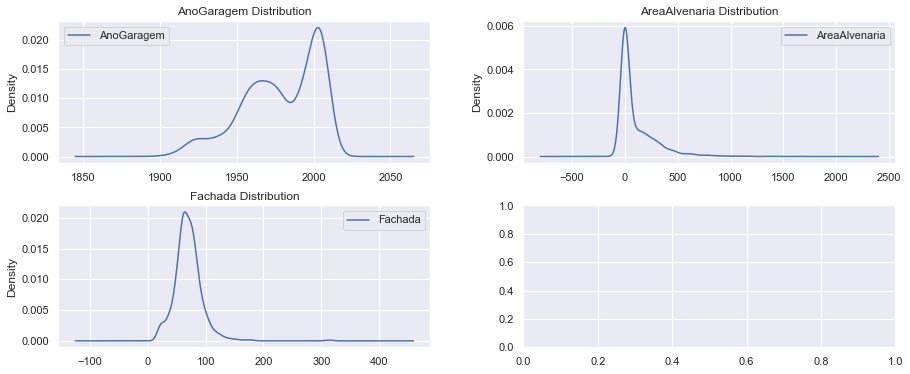

<IPython.core.display.Javascript object>

In [20]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))
f.subplots_adjust(hspace=0.3, wspace=0.25)
df_NumMask.AnoGaragem.plot(
    kind="kde", ax=axes[0][0], legend=True, title="AnoGaragem Distribution"
)
df_NumMask.AreaAlvenaria.plot(
    kind="kde", ax=axes[0][1], legend=True, title="AreaAlvenaria Distribution"
)
df_NumMask.Fachada.plot(
    kind="kde", ax=axes[1][0], legend=True, title="Fachada Distribution"
)

As this distributions don't present normal distribution, let's replace the null values by their medians.

In [21]:
# replacing in the original database df
df["AnoGaragem"].fillna(df["AnoGaragem"].median(), inplace=True)
df["AreaAlvenaria"].fillna(df["AreaAlvenaria"].median(), inplace=True)
df["Fachada"].fillna(df["Fachada"].median(), inplace=True)

<IPython.core.display.Javascript object>

In [22]:
# Copying the code for df_NumMask for a quick review in results
df_NumMask["AnoGaragem"].fillna(df["AnoGaragem"].median(), inplace=True)
df_NumMask["AreaAlvenaria"].fillna(df["AreaAlvenaria"].median(), inplace=True)
df_NumMask["Fachada"].fillna(df["Fachada"].median(), inplace=True)
df_NumMask.describe()

AnoGaragem  AreaAlvenaria      Fachada
count  1460.000000    1460.000000  1460.000000
mean   1978.589041     103.117123    69.863699
std      23.997022     180.731373    22.027677
min    1900.000000       0.000000    21.000000
25%    1962.000000       0.000000    60.000000
50%    1980.000000       0.000000    69.000000
75%    2001.000000     164.250000    79.000000
max    2010.000000    1600.000000   313.000000

<IPython.core.display.Javascript object>

#### The linear regression is related to the mean value verification regarding the colected sample. As the result origins from the sample mean, it is important to understand that all the values in our sample have influence in the final result. So we do not want wrong analysis or prediction from data that was wrongly colected, typed or do not represent the population of interest. Saying that, we need to verify the presence of outliers in the chosen variables. The outliers have big influence in the mean final result and they do not represent the population of interest.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

<AxesSubplot:title={'center':'AreaGaragem by PrecoVenda'}, xlabel='AreaGaragem', ylabel='PrecoVenda'>

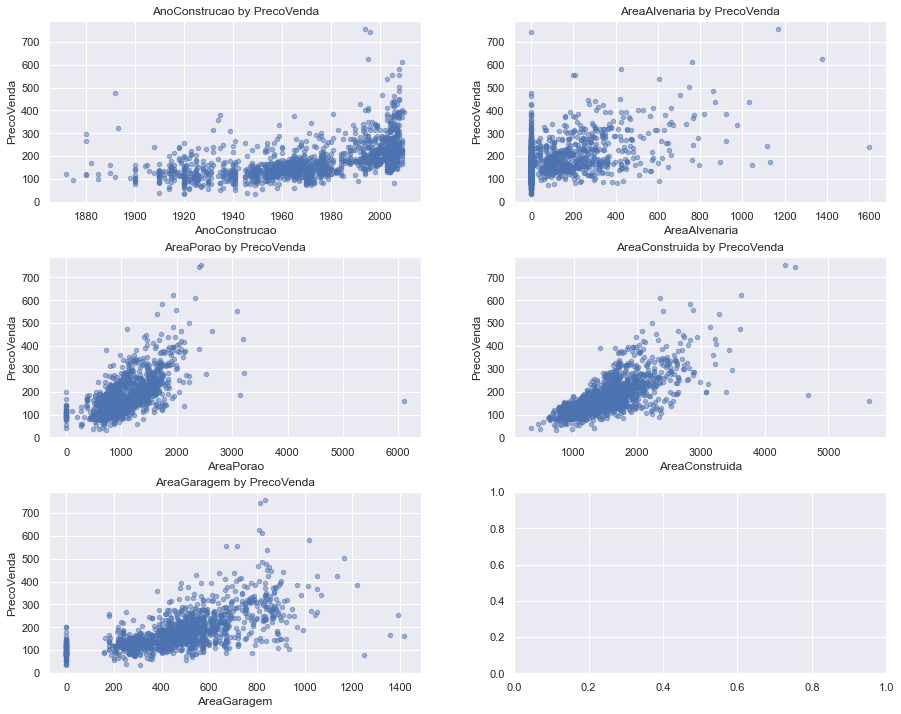

<IPython.core.display.Javascript object>

In [23]:
f, axes = plt.subplots(3, 2, figsize=(15, 12))
f.subplots_adjust(hspace=0.3, wspace=0.25)

df.plot(
    "AnoConstrucao",
    "PrecoVenda",
    kind="scatter",
    ax=axes[0][0],
    alpha=0.5,
    title="AnoConstrucao by PrecoVenda",
)
df.plot(
    "AreaAlvenaria",
    "PrecoVenda",
    kind="scatter",
    ax=axes[0][1],
    alpha=0.5,
    title="AreaAlvenaria by PrecoVenda",
)
df.plot(
    "AreaPorao",
    "PrecoVenda",
    kind="scatter",
    ax=axes[1][0],
    alpha=0.5,
    title="AreaPorao by PrecoVenda",
)
df.plot(
    "AreaConstruida",
    "PrecoVenda",
    kind="scatter",
    ax=axes[1][1],
    alpha=0.5,
    title="AreaConstruida by PrecoVenda",
)
df.plot(
    "AreaGaragem",
    "PrecoVenda",
    kind="scatter",
    ax=axes[2][0],
    alpha=0.5,
    title="AreaGaragem by PrecoVenda",
)

#### For the outliers found in our variables, I will replace them by the lower or upper value of the distribution.

<AxesSubplot:>

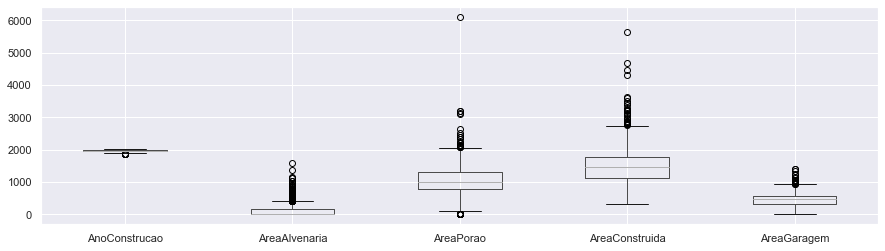

<IPython.core.display.Javascript object>

In [24]:
Mask = pd.DataFrame(
    data=df,
    columns=[
        "AnoConstrucao",
        "AreaAlvenaria",
        "AreaPorao",
        "AreaConstruida",
        "AreaGaragem",
    ],
)
Mask.boxplot()

Text(0.5, 1.0, 'AreaGaragem Boxplot')

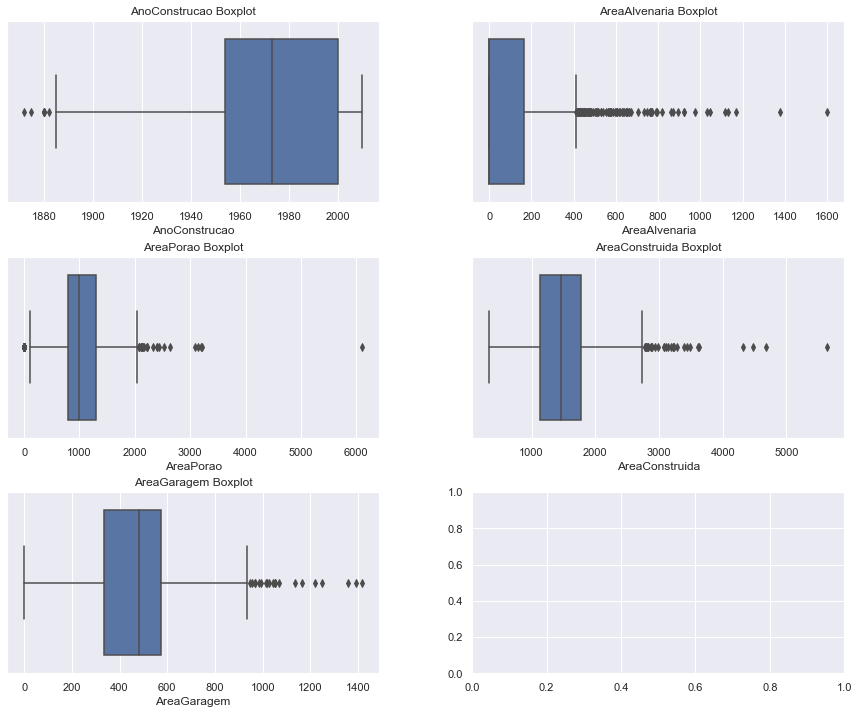

<IPython.core.display.Javascript object>

In [25]:
f, axes = plt.subplots(3, 2, figsize=(15, 12))
f.subplots_adjust(hspace=0.3, wspace=0.25)

sns.boxplot(x="AnoConstrucao", data=df, ax=axes[0][0]).set_title(
    "AnoConstrucao Boxplot"
)
sns.boxplot(x="AreaAlvenaria", data=df, ax=axes[0][1]).set_title(
    "AreaAlvenaria Boxplot"
)
sns.boxplot(x="AreaPorao", data=df, ax=axes[1][0]).set_title("AreaPorao Boxplot")
sns.boxplot(x="AreaConstruida", data=df, ax=axes[1][1]).set_title(
    "AreaConstruida Boxplot"
)
sns.boxplot(x="AreaGaragem", data=df, ax=axes[2][0]).set_title("AreaGaragem Boxplot")

In [26]:
def NumOutlierRep(database, column):
    q3, q1 = np.percentile(database[column], [75, 25])
    iqr = q3 - q1
    lower_range = q1 - 1.5 * iqr
    upper_range = q3 + 1.5 * iqr
    for i in database[column]:
        if i > upper_range:
            database[column] = database[column].replace(to_replace=i, value=upper_range)
        elif i < lower_range:
            database[column] = database[column].replace(to_replace=i, value=lower_range)
    print("The minimum value of the variable", column, " is:", database[column].min())
    print("The maximum value of the variable", column, " is:", database[column].max())

<IPython.core.display.Javascript object>

In [27]:
NumOutlierRep(df, "AnoConstrucao")

NumOutlierRep(df, "AreaAlvenaria")

NumOutlierRep(df, "AreaPorao")

NumOutlierRep(df, "AreaConstruida")

NumOutlierRep(df, "AreaGaragem")

The minimum value of the variable AnoConstrucao  is: 1885
The maximum value of the variable AnoConstrucao  is: 2010
The minimum value of the variable AreaAlvenaria  is: 0.0
The maximum value of the variable AreaAlvenaria  is: 410.625
The minimum value of the variable AreaPorao  is: 42
The maximum value of the variable AreaPorao  is: 2052
The minimum value of the variable AreaConstruida  is: 334.0
The maximum value of the variable AreaConstruida  is: 2747.625
The minimum value of the variable AreaGaragem  is: 0.0
The maximum value of the variable AreaGaragem  is: 938.25


<IPython.core.display.Javascript object>

In [28]:
df.describe()

Id      Fachada    TamanhoLote  AnoConstrucao   AnoReforma  \
count  1460.000000  1460.000000    1460.000000    1460.000000  1460.000000   
mean    730.500000    69.863699   10516.828082    1971.299315  1984.865753   
std     421.610009    22.027677    9981.264932      30.108397    20.645407   
min       1.000000    21.000000    1300.000000    1885.000000  1950.000000   
25%     365.750000    60.000000    7553.500000    1954.000000  1967.000000   
50%     730.500000    69.000000    9478.500000    1973.000000  1994.000000   
75%    1095.250000    79.000000   11601.500000    2000.000000  2004.000000   
max    1460.000000   313.000000  215245.000000    2010.000000  2010.000000   

       AreaAlvenaria  AreaAcabPorao1  AreaAcabPorao2  AreaInacabPorao  \
count    1460.000000     1460.000000     1460.000000      1460.000000   
mean       89.406336      443.639726       46.549315       567.240411   
std       134.017553      456.098091      161.319273       441.866955   
min         0.000000        0.000000        0.000000         0.000000   
25%         0.000000        0.000000        0.000000       223.000000   
50%         0.000000      383.500000        0.000000       477.500000   
75%       164.250000      712.250000        0.000000       808.000000   
max       410.625000     5644.000000     1474.000000      2336.000000   

         AreaPorao   AreaTerreo   Area2Andar  BaixaQualiAreaAcab  \
count  1460.000000  1460.000000  1460.000000         1460.000000   
mean   1050.254795  1162.626712   346.992466            5.844521   
std     397.937878   386.587738   436.528436           48.623081   
min      42.000000   334.000000     0.000000            0.000000   
25%     795.750000   882.000000     0.000000            0.000000   
50%     991.500000  1087.000000     0.000000            0.000000   
75%    1298.250000  1391.250000   728.000000            0.000000   
max    2052.000000  4692.000000  2065.000000          572.000000   

       AreaConstruida  BanheiroPorao  LavaboPorao     Banheiro       Lavabo  \
count     1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean      1503.735873       0.425342     0.057534     1.565068     0.382877   
std        481.375641       0.518911     0.238753     0.550916     0.502885   
min        334.000000       0.000000     0.000000     0.000000     0.000000   
25%       1129.500000       0.000000     0.000000     1.000000     0.000000   
50%       1464.000000       0.000000     0.000000     2.000000     0.000000   
75%       1776.750000       1.000000     0.000000     2.000000     1.000000   
max       2747.625000       3.000000     2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotalQuartos      Lareira   AnoGaragem  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.589041   
std        0.815778      0.220338      1.625393     0.644666    23.997022   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1962.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

       CarrosGaragem  AreaGaragem     AreaDeck  AreaVarandaAberta  \
count    1460.000000  1460.000000  1460.000000        1460.000000   
mean        1.767123   470.670719    94.244521          46.660274   
std         0.747315   207.105729   125.338794          66.256028   
min         0.000000     0.000000     0.000000           0.000000   
25%         1.000000   334.500000     0.000000           0.000000   
50%         2.000000   480.000000     0.000000          25.000000   
75%         2.000000   576.000000   168.000000          68.000000   
max         4.000000   938.250000   857.000000         547.000000   

       AreaVar

<IPython.core.display.Javascript object>

Let's check how the correlation between the chosen variables is after the modifications.

In [29]:
df_NumMask2 = pd.DataFrame(
    df[
        [
            "AnoConstrucao",
            "AreaAlvenaria",
            "AreaPorao",
            "AreaConstruida",
            "AreaGaragem",
            "log_PrecoVenda",
        ]
    ]
)

df_NumMask2

AnoConstrucao  AreaAlvenaria  AreaPorao  AreaConstruida  AreaGaragem  \
0              2003          196.0        856          1710.0        548.0   
1              1976            0.0       1262          1262.0        460.0   
2              2001          162.0        920          1786.0        608.0   
3              1915            0.0        756          1717.0        642.0   
4              2000          350.0       1145          2198.0        836.0   
...             ...            ...        ...             ...          ...   
1455           1999            0.0        953          1647.0        460.0   
1456           1978          119.0       1542          2073.0        500.0   
1457           1941            0.0       1152          2340.0        252.0   
1458           1950            0.0       1078          1078.0        240.0   
1459           1965            0.0       1256          1256.0        276.0   

      log_PrecoVenda  
0           5.339939  
1           5.201256  
2           5.409411  
3           4.941642  
4           5.521461  
...              ...  
1455        5.164786  
1456        5.347108  
1457        5.585374  
1458        4.956707  
1459        4.993828  

[1460 rows x 6 columns]

<IPython.core.display.Javascript object>

In [30]:
corr2 = df_NumMask2.corr()
# Fill diagonal and upper half with NaNs
Num_Mask3 = np.zeros_like(corr2, dtype=bool)
Num_Mask3[np.triu_indices_from(Num_Mask3)] = True
corr2[Num_Mask3] = np.nan
(
    corr2.style.background_gradient(cmap="coolwarm", axis=None, vmin=-1, vmax=1)
    .highlight_null(null_color="#f1f1f1")  # Color NaNs grey
    .set_precision(2)
)

C:\Users\User\AppData\Local\Temp/ipykernel_28308/2043402907.py:7: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



<IPython.core.display.Javascript object>

Possible to notice that the variables kept a good correlation with our target.

## Categorical Variables Cleaning and Treatment

#### Let's find the columns that contain null values for categorical types.

In [31]:
df_NullCat = df.select_dtypes(include=["category"])
df_NullCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ClasseImovel          1460 non-null   category
 1   ClasseZona            1460 non-null   category
 2   Rua                   1460 non-null   category
 3   Beco                  91 non-null     category
 4   FormaProp             1460 non-null   category
 5   PlanoProp             1460 non-null   category
 6   Servicos              1460 non-null   category
 7   ConfigLote            1460 non-null   category
 8   InclinacaoLote        1460 non-null   category
 9   Bairro                1460 non-null   category
 10  Estrada1              1460 non-null   category
 11  Estrada2              1460 non-null   category
 12  TipoHabitacao         1460 non-null   category
 13  EstiloHabitacao       1460 non-null   category
 14  Qualidade             1460 non-null   category
 15  Cond

<IPython.core.display.Javascript object>

In [32]:
# Some of our variables have few information that is not even worth to leave in our data frame.

df.drop(
    ["Beco", "QualdiadeLareira", "QualidadePiscina", "QualidadeCerca", "Outros"],
    axis=1,
    inplace=True,
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Id                    1460 non-null   int64   
 1   ClasseImovel          1460 non-null   category
 2   ClasseZona            1460 non-null   category
 3   Fachada               1460 non-null   float64 
 4   TamanhoLote           1460 non-null   int64   
 5   Rua                   1460 non-null   category
 6   FormaProp             1460 non-null   category
 7   PlanoProp             1460 non-null   category
 8   Servicos              1460 non-null   category
 9   ConfigLote            1460 non-null   category
 10  InclinacaoLote        1460 non-null   category
 11  Bairro                1460 non-null   category
 12  Estrada1              1460 non-null   category
 13  Estrada2              1460 non-null   category
 14  TipoHabitacao         1460 non-null   category
 15  Esti

<IPython.core.display.Javascript object>

In [33]:
df_nullPercent = dict(df.isnull().mean().round(4) * 100)
df_nullPercent

{'Id': 0.0,
 'ClasseImovel': 0.0,
 'ClasseZona': 0.0,
 'Fachada': 0.0,
 'TamanhoLote': 0.0,
 'Rua': 0.0,
 'FormaProp': 0.0,
 'PlanoProp': 0.0,
 'Servicos': 0.0,
 'ConfigLote': 0.0,
 'InclinacaoLote': 0.0,
 'Bairro': 0.0,
 'Estrada1': 0.0,
 'Estrada2': 0.0,
 'TipoHabitacao': 0.0,
 'EstiloHabitacao': 0.0,
 'Qualidade': 0.0,
 'Condicao': 0.0,
 'AnoConstrucao': 0.0,
 'AnoReforma': 0.0,
 'TipoTelhado': 0.0,
 'MaterialTelhado': 0.0,
 'Exterior1': 0.0,
 'Exterior2': 0.0,
 'TipoAlvenaria': 0.5499999999999999,
 'AreaAlvenaria': 0.0,
 'QualidadeCobertura': 0.0,
 'CondicaoExterna': 0.0,
 'TipoFundacao': 0.0,
 'AlturaPorao': 2.53,
 'CondicaoPorao': 2.53,
 'ParedePorao': 2.6,
 'TipoAcabPorao1': 2.53,
 'AreaAcabPorao1': 0.0,
 'TipoAcabPorao2': 2.6,
 'AreaAcabPorao2': 0.0,
 'AreaInacabPorao': 0.0,
 'AreaPorao': 0.0,
 'Aquecimento': 0.0,
 'QualidadeAquecimento': 0.0,
 'ArCentral': 0.0,
 'InstalacaoEletrica': 0.06999999999999999,
 'AreaTerreo': 0.0,
 'Area2Andar': 0.0,
 'BaixaQualiAreaAcab': 0.0,
 'Are

<IPython.core.display.Javascript object>

The variables with categories that contain few representants will be added to other category or a new one.

In [34]:
def CatNullReplace(data, column):
    x = data[column].mode()
    data[column].fillna(x[0], inplace=True)

<IPython.core.display.Javascript object>

In [35]:
CatNullReplace(df, "CondicaoGaragem")
CatNullReplace(df, "QualidadeGaragem")
CatNullReplace(df, "AcabamentoGaragem")
CatNullReplace(df, "LocalGaragem")
CatNullReplace(df, "InstalacaoEletrica")
CatNullReplace(df, "TipoAcabPorao2")
CatNullReplace(df, "TipoAcabPorao1")
CatNullReplace(df, "ParedePorao")
CatNullReplace(df, "CondicaoPorao")
CatNullReplace(df, "AlturaPorao")
CatNullReplace(df, "TipoAlvenaria")
df.isnull().sum()

Id                0
ClasseImovel      0
ClasseZona        0
Fachada           0
TamanhoLote       0
                 ..
TipoVenda         0
CondicaoVenda     0
PrecoVenda        0
log_PrecoVenda    0
z_PrecoVenda      0
Length: 78, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
df_Cat = df.select_dtypes(include=["category"])
df_Cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ClasseImovel          1460 non-null   category
 1   ClasseZona            1460 non-null   category
 2   Rua                   1460 non-null   category
 3   FormaProp             1460 non-null   category
 4   PlanoProp             1460 non-null   category
 5   Servicos              1460 non-null   category
 6   ConfigLote            1460 non-null   category
 7   InclinacaoLote        1460 non-null   category
 8   Bairro                1460 non-null   category
 9   Estrada1              1460 non-null   category
 10  Estrada2              1460 non-null   category
 11  TipoHabitacao         1460 non-null   category
 12  EstiloHabitacao       1460 non-null   category
 13  Qualidade             1460 non-null   category
 14  Condicao              1460 non-null   category
 15  Tipo

<IPython.core.display.Javascript object>

#### Let's see how the distributions of each category of each variable behave.

ConfigLote
Corner     AxesSubplot(0.555556,0.125;0.344444x0.151)
CulDSac    AxesSubplot(0.555556,0.125;0.344444x0.151)
FR2        AxesSubplot(0.555556,0.125;0.344444x0.151)
FR3        AxesSubplot(0.555556,0.125;0.344444x0.151)
Inside     AxesSubplot(0.555556,0.125;0.344444x0.151)
Name: PrecoVenda, dtype: object

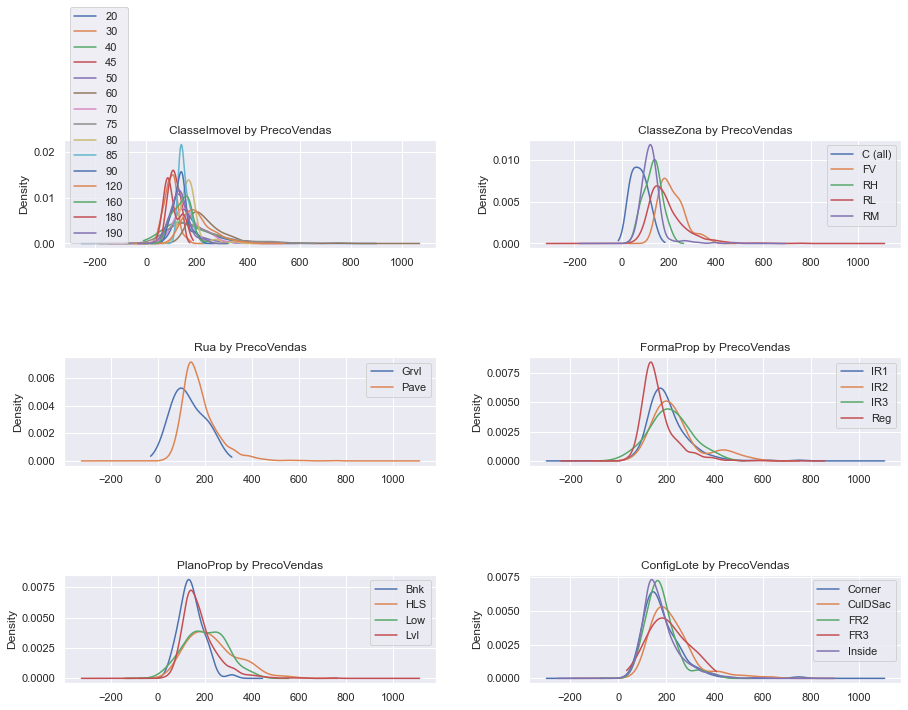

<IPython.core.display.Javascript object>

In [37]:
xyMask_train = df.copy(deep=True)
xyMask_train

f, axes = plt.subplots(3, 2, figsize=(15, 10))
f.subplots_adjust(hspace=1, wspace=0.25)
xyMask_train.groupby("ClasseImovel").PrecoVenda.plot(
    kind="kde", ax=axes[0][0], legend=True, title="ClasseImovel by PrecoVendas"
)
xyMask_train.groupby("ClasseZona").PrecoVenda.plot(
    kind="kde", ax=axes[0][1], legend=True, title="ClasseZona by PrecoVendas"
)
xyMask_train.groupby("Rua").PrecoVenda.plot(
    kind="kde", ax=axes[1][0], legend=True, title="Rua by PrecoVendas"
)
xyMask_train.groupby("FormaProp").PrecoVenda.plot(
    kind="kde", ax=axes[1][1], legend=True, title="FormaProp by PrecoVendas"
)
xyMask_train.groupby("PlanoProp").PrecoVenda.plot(
    kind="kde", ax=axes[2][0], legend=True, title="PlanoProp by PrecoVendas"
)
xyMask_train.groupby("ConfigLote").PrecoVenda.plot(
    kind="kde", ax=axes[2][1], legend=True, title="ConfigLote by PrecoVendas"
)

Above, the variables ClasseImovel and ClasseZona seem presenting different means for their categories, which indicates a chance of correlation with our response variable.

Let's decrease the amount of categories for the variable 'Bairro'.

EstiloHabitacao
1.5Fin    AxesSubplot(0.555556,0.125;0.344444x0.151)
1.5Unf    AxesSubplot(0.555556,0.125;0.344444x0.151)
1Story    AxesSubplot(0.555556,0.125;0.344444x0.151)
2.5Fin    AxesSubplot(0.555556,0.125;0.344444x0.151)
2.5Unf    AxesSubplot(0.555556,0.125;0.344444x0.151)
2Story    AxesSubplot(0.555556,0.125;0.344444x0.151)
SFoyer    AxesSubplot(0.555556,0.125;0.344444x0.151)
SLvl      AxesSubplot(0.555556,0.125;0.344444x0.151)
Name: PrecoVenda, dtype: object

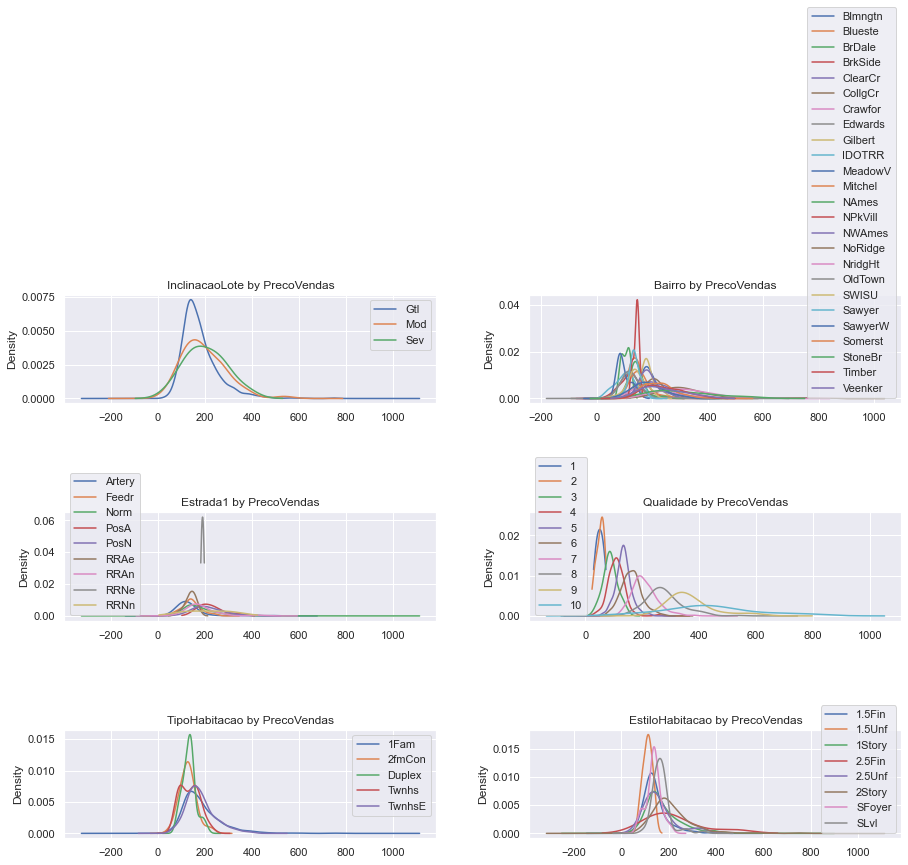

<IPython.core.display.Javascript object>

In [38]:
f, axes = plt.subplots(3, 2, figsize=(15, 10))
f.subplots_adjust(hspace=1, wspace=0.25)
xyMask_train.groupby("InclinacaoLote").PrecoVenda.plot(
    kind="kde", ax=axes[0][0], legend=True, title="InclinacaoLote by PrecoVendas"
)
xyMask_train.groupby("Bairro").PrecoVenda.plot(
    kind="kde", ax=axes[0][1], legend=True, title="Bairro by PrecoVendas"
)
xyMask_train.groupby("Estrada1").PrecoVenda.plot(
    kind="kde", ax=axes[1][0], legend=True, title="Estrada1 by PrecoVendas"
)
xyMask_train.groupby("Qualidade").PrecoVenda.plot(
    kind="kde", ax=axes[1][1], legend=True, title="Qualidade by PrecoVendas"
)
xyMask_train.groupby("TipoHabitacao").PrecoVenda.plot(
    kind="kde", ax=axes[2][0], legend=True, title="TipoHabitacao by PrecoVendas"
)
xyMask_train.groupby("EstiloHabitacao").PrecoVenda.plot(
    kind="kde", ax=axes[2][1], legend=True, title="EstiloHabitacao by PrecoVendas"
)

Above, the variables Bairro, Qualidade, Estrada1, and EstiloHabitacao seem presenting different means for their categories, which may indicate there is correlation with our response variable.

TipoAlvenaria
BrkCmn     AxesSubplot(0.555556,0.125;0.344444x0.151)
BrkFace    AxesSubplot(0.555556,0.125;0.344444x0.151)
None       AxesSubplot(0.555556,0.125;0.344444x0.151)
Stone      AxesSubplot(0.555556,0.125;0.344444x0.151)
Name: PrecoVenda, dtype: object

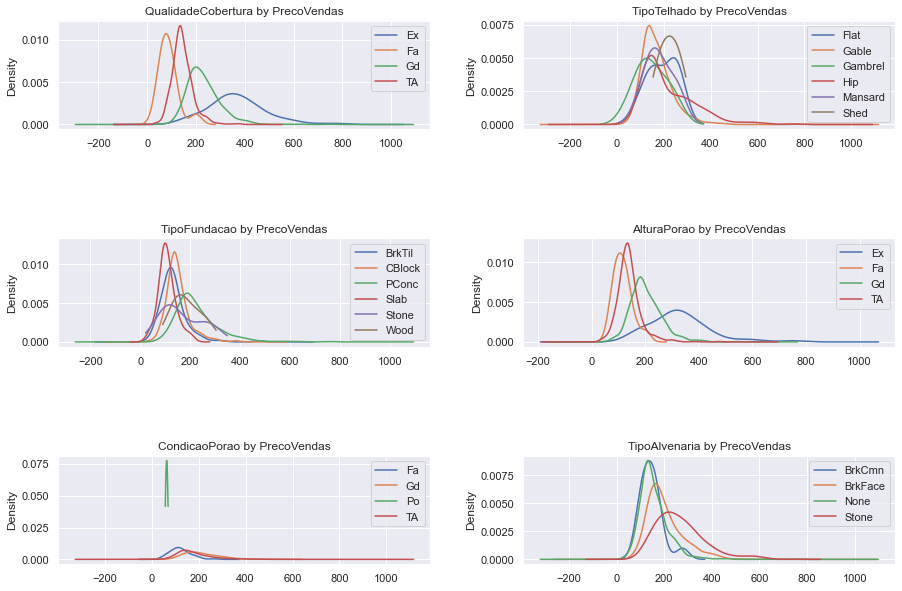

<IPython.core.display.Javascript object>

In [39]:
f, axes = plt.subplots(3, 2, figsize=(15, 10))
f.subplots_adjust(hspace=1, wspace=0.25)
xyMask_train.groupby("QualidadeCobertura").PrecoVenda.plot(
    kind="kde", ax=axes[0][0], legend=True, title="QualidadeCobertura by PrecoVendas"
)
xyMask_train.groupby("TipoTelhado").PrecoVenda.plot(
    kind="kde", ax=axes[0][1], legend=True, title="TipoTelhado by PrecoVendas"
)
xyMask_train.groupby("TipoFundacao").PrecoVenda.plot(
    kind="kde", ax=axes[1][0], legend=True, title="TipoFundacao by PrecoVendas"
)
xyMask_train.groupby("AlturaPorao").PrecoVenda.plot(
    kind="kde", ax=axes[1][1], legend=True, title="AlturaPorao by PrecoVendas"
)
xyMask_train.groupby("CondicaoPorao").PrecoVenda.plot(
    kind="kde", ax=axes[2][0], legend=True, title="CondicaoPorao by PrecoVendas"
)
xyMask_train.groupby("TipoAlvenaria").PrecoVenda.plot(
    kind="kde", ax=axes[2][1], legend=True, title="TipoAlvenaria by PrecoVendas"
)

Above, the variables seem not presenting significant relationship as the other chosen previously (lower density).

ArCentral
N    AxesSubplot(0.555556,0.125;0.344444x0.151)
Y    AxesSubplot(0.555556,0.125;0.344444x0.151)
Name: PrecoVenda, dtype: object

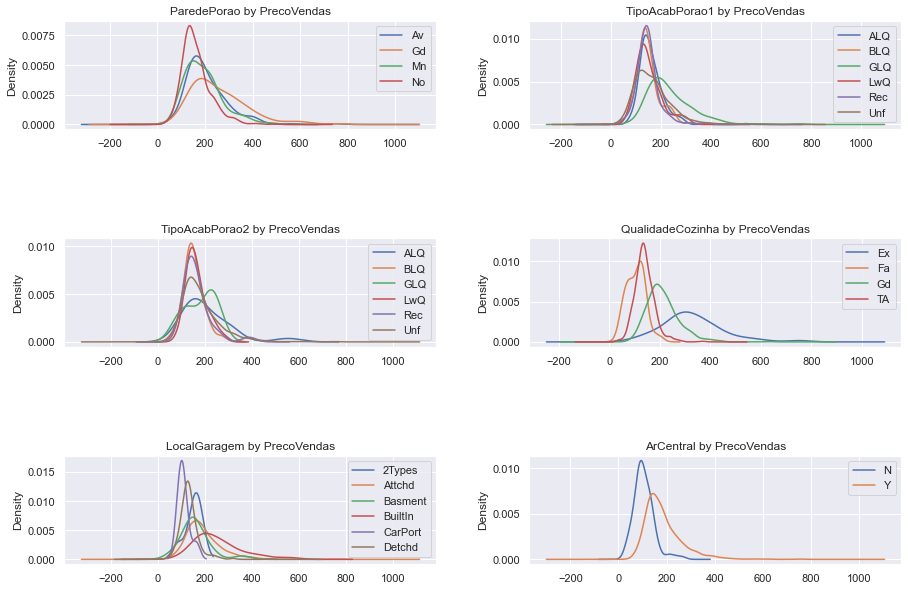

<IPython.core.display.Javascript object>

In [40]:
f, axes = plt.subplots(3, 2, figsize=(15, 10))
f.subplots_adjust(hspace=1, wspace=0.25)
xyMask_train.groupby("ParedePorao").PrecoVenda.plot(
    kind="kde", ax=axes[0][0], legend=True, title="ParedePorao by PrecoVendas"
)
xyMask_train.groupby("TipoAcabPorao1").PrecoVenda.plot(
    kind="kde", ax=axes[0][1], legend=True, title="TipoAcabPorao1 by PrecoVendas"
)
xyMask_train.groupby("TipoAcabPorao2").PrecoVenda.plot(
    kind="kde", ax=axes[1][0], legend=True, title="TipoAcabPorao2 by PrecoVendas"
)
xyMask_train.groupby("QualidadeCozinha").PrecoVenda.plot(
    kind="kde", ax=axes[1][1], legend=True, title="QualidadeCozinha by PrecoVendas"
)
xyMask_train.groupby("LocalGaragem").PrecoVenda.plot(
    kind="kde", ax=axes[2][0], legend=True, title="LocalGaragem by PrecoVendas"
)
xyMask_train.groupby("ArCentral").PrecoVenda.plot(
    kind="kde", ax=axes[2][1], legend=True, title="ArCentral by PrecoVendas"
)

Above, the variables seem not presenting significant relationship as the other chosen previously (lower density).

CondicaoVenda
Abnorml    AxesSubplot(0.555556,0.125;0.344444x0.151)
AdjLand    AxesSubplot(0.555556,0.125;0.344444x0.151)
Alloca     AxesSubplot(0.555556,0.125;0.344444x0.151)
Family     AxesSubplot(0.555556,0.125;0.344444x0.151)
Normal     AxesSubplot(0.555556,0.125;0.344444x0.151)
Partial    AxesSubplot(0.555556,0.125;0.344444x0.151)
Name: PrecoVenda, dtype: object

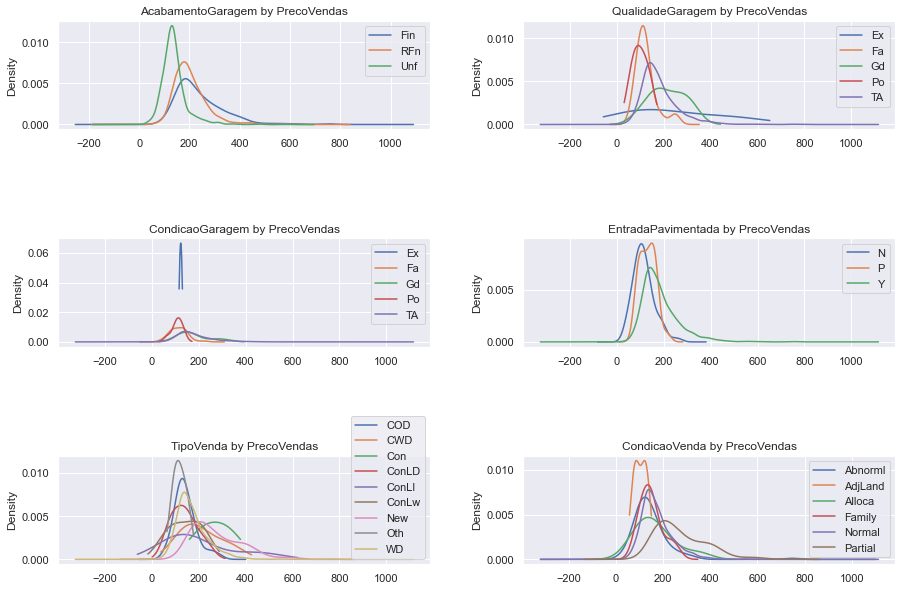

<IPython.core.display.Javascript object>

In [41]:
f, axes = plt.subplots(3, 2, figsize=(15, 10))
f.subplots_adjust(hspace=1, wspace=0.25)
xyMask_train.groupby("AcabamentoGaragem").PrecoVenda.plot(
    kind="kde", ax=axes[0][0], legend=True, title="AcabamentoGaragem by PrecoVendas"
)
xyMask_train.groupby("QualidadeGaragem").PrecoVenda.plot(
    kind="kde", ax=axes[0][1], legend=True, title="QualidadeGaragem by PrecoVendas"
)
xyMask_train.groupby("CondicaoGaragem").PrecoVenda.plot(
    kind="kde", ax=axes[1][0], legend=True, title="CondicaoGaragem by PrecoVendas"
)
xyMask_train.groupby("EntradaPavimentada").PrecoVenda.plot(
    kind="kde", ax=axes[1][1], legend=True, title="EntradaPavimentada by PrecoVendas"
)
xyMask_train.groupby("TipoVenda").PrecoVenda.plot(
    kind="kde", ax=axes[2][0], legend=True, title="TipoVenda by PrecoVendas"
)
xyMask_train.groupby("CondicaoVenda").PrecoVenda.plot(
    kind="kde", ax=axes[2][1], legend=True, title="CondicaoVenda by PrecoVendas"
)

Above, despite having high density, the variable CondicaoGaragem seem to present quite similar means among its categories, which indicates possibility not having correlation with our response variable.

In [42]:
xyMask_train["Servicos"].value_counts()

AllPub    1459
NoSeWa       1
Name: Servicos, dtype: int64

<IPython.core.display.Javascript object>

In [43]:
xyMask_train["Servicos"] = xyMask_train["Servicos"].replace(
    to_replace=("NoSeWa"), value="AllPub"
)

<IPython.core.display.Javascript object>

In [44]:
xyMask_train["Servicos"].value_counts()

AllPub    1460
Name: Servicos, dtype: int64

<IPython.core.display.Javascript object>

In [45]:
xyMask_train["Estrada2"].value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Estrada2, dtype: int64

<IPython.core.display.Javascript object>

In [46]:
xyMask_train["Estrada2"] = xyMask_train["Estrada2"].replace(
    to_replace=("RRAe", "RRAn", "RRNn"), value="RRA"
)
xyMask_train["Estrada2"] = xyMask_train["Estrada2"].replace(
    to_replace=("PosA", "PosN"), value="Pos"
)

<IPython.core.display.Javascript object>

In [47]:
xyMask_train["Estrada2"].value_counts()

Norm      1445
Feedr        6
RRA          4
Pos          3
Artery       2
Name: Estrada2, dtype: int64

<IPython.core.display.Javascript object>

In [48]:
xyMask_train["Condicao"].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: Condicao, dtype: int64

<IPython.core.display.Javascript object>

In [49]:
xyMask_train["Condicao"] = xyMask_train["Condicao"].replace(to_replace=(1), value=2)

<IPython.core.display.Javascript object>

In [50]:
xyMask_train["Condicao"].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      6
Name: Condicao, dtype: int64

<IPython.core.display.Javascript object>

In [51]:
xyMask_train["MaterialTelhado"].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: MaterialTelhado, dtype: int64

<IPython.core.display.Javascript object>

In [52]:
xyMask_train["MaterialTelhado"] = xyMask_train["MaterialTelhado"].replace(
    to_replace=("ClyTile", "Metal", "Roll", "Membran"), value="Others"
)

<IPython.core.display.Javascript object>

In [53]:
xyMask_train["MaterialTelhado"].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Others        4
Name: MaterialTelhado, dtype: int64

<IPython.core.display.Javascript object>

In [54]:
xyMask_train["CondicaoExterna"].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: CondicaoExterna, dtype: int64

<IPython.core.display.Javascript object>

In [55]:
xyMask_train["CondicaoExterna"] = xyMask_train["CondicaoExterna"].replace(
    to_replace=("Po", "Ex"), value="Others"
)

<IPython.core.display.Javascript object>

In [56]:
xyMask_train["CondicaoExterna"].value_counts()

TA        1282
Gd         146
Fa          28
Others       4
Name: CondicaoExterna, dtype: int64

<IPython.core.display.Javascript object>

In [57]:
xyMask_train["Exterior1"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1, dtype: int64

<IPython.core.display.Javascript object>

In [58]:
xyMask_train["Exterior1"] = xyMask_train["Exterior1"].replace(
    to_replace=("BrkComm", "AsphShn", "CBlock", "ImStucc", "Stone"), value="Others"
)

<IPython.core.display.Javascript object>

In [59]:
xyMask_train["Exterior1"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Others       7
Name: Exterior1, dtype: int64

<IPython.core.display.Javascript object>

Exterior1
AsbShng    AxesSubplot(0.555556,0.125;0.344444x0.151)
Others     AxesSubplot(0.555556,0.125;0.344444x0.151)
BrkFace    AxesSubplot(0.555556,0.125;0.344444x0.151)
CemntBd    AxesSubplot(0.555556,0.125;0.344444x0.151)
HdBoard    AxesSubplot(0.555556,0.125;0.344444x0.151)
MetalSd    AxesSubplot(0.555556,0.125;0.344444x0.151)
Plywood    AxesSubplot(0.555556,0.125;0.344444x0.151)
Stucco     AxesSubplot(0.555556,0.125;0.344444x0.151)
VinylSd    AxesSubplot(0.555556,0.125;0.344444x0.151)
Wd Sdng    AxesSubplot(0.555556,0.125;0.344444x0.151)
WdShing    AxesSubplot(0.555556,0.125;0.344444x0.151)
Name: PrecoVenda, dtype: object

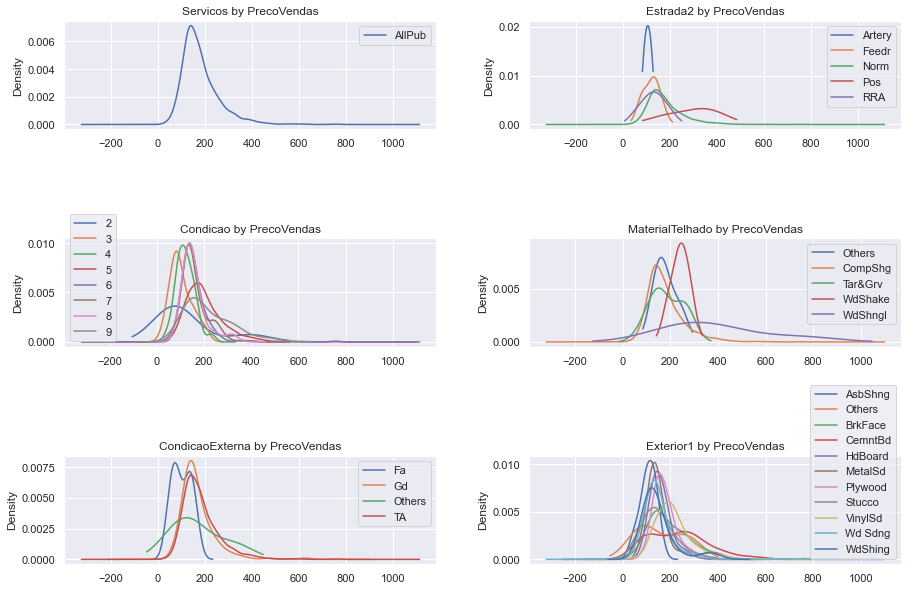

<IPython.core.display.Javascript object>

In [60]:
f, axes = plt.subplots(3, 2, figsize=(15, 10))
f.subplots_adjust(hspace=1, wspace=0.25)
xyMask_train.groupby("Servicos").PrecoVenda.plot(
    kind="kde", ax=axes[0][0], legend=True, title="Servicos by PrecoVendas"
)
xyMask_train.groupby("Estrada2").PrecoVenda.plot(
    kind="kde", ax=axes[0][1], legend=True, title="Estrada2 by PrecoVendas"
)
xyMask_train.groupby("Condicao").PrecoVenda.plot(
    kind="kde", ax=axes[1][0], legend=True, title="Condicao by PrecoVendas"
)
xyMask_train.groupby("MaterialTelhado").PrecoVenda.plot(
    kind="kde", ax=axes[1][1], legend=True, title="MaterialTelhado by PrecoVendas"
)
xyMask_train.groupby("CondicaoExterna").PrecoVenda.plot(
    kind="kde", ax=axes[2][0], legend=True, title="CondicaoExterna by PrecoVendas"
)
xyMask_train.groupby("Exterior1").PrecoVenda.plot(
    kind="kde", ax=axes[2][1], legend=True, title="Exterior1 by PrecoVendas"
)

Above, the variables don't seem to show high density or different means in a representative way.

Below, it is possible to check the boxplots for thecategorical variables that called attention during the distribution analysis.

Text(0.5, 1.0, 'Distribution of EstiloHabitacao by PrecoVenda')

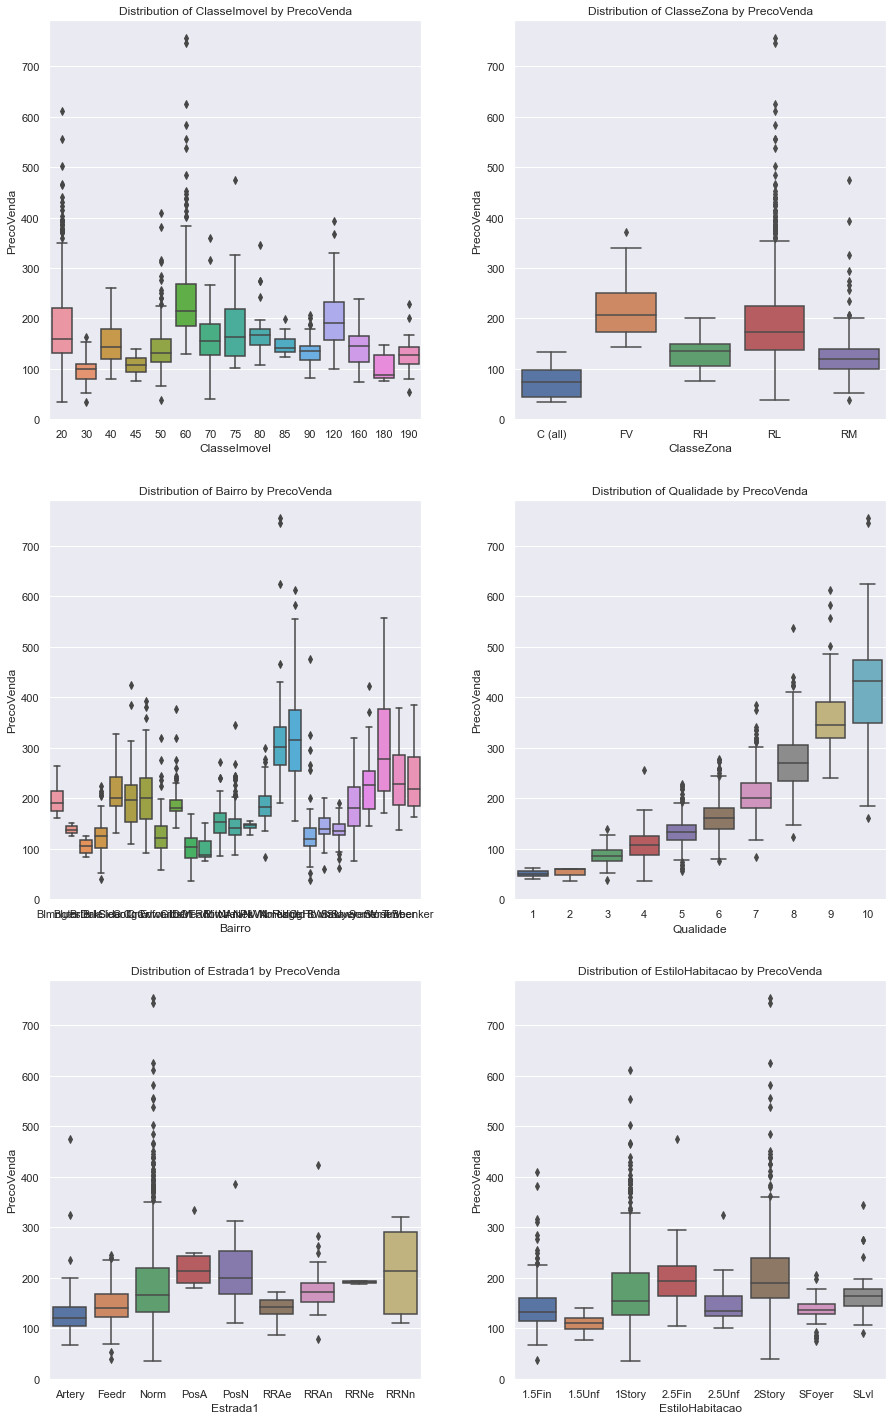

<IPython.core.display.Javascript object>

In [61]:
f, axes = plt.subplots(3, 2, figsize=(15, 25))
f.subplots_adjust(hspace=0.2, wspace=0.25)

sns.boxplot(
    x="ClasseImovel", y="PrecoVenda", data=xyMask_train, ax=axes[0][0]
).set_title("Distribution of ClasseImovel by PrecoVenda")
sns.boxplot(x="ClasseZona", y="PrecoVenda", data=xyMask_train, ax=axes[0][1]).set_title(
    "Distribution of ClasseZona by PrecoVenda"
)
sns.boxplot(x="Bairro", y="PrecoVenda", data=xyMask_train, ax=axes[1][0]).set_title(
    "Distribution of Bairro by PrecoVenda"
)
sns.boxplot(x="Qualidade", y="PrecoVenda", data=xyMask_train, ax=axes[1][1]).set_title(
    "Distribution of Qualidade by PrecoVenda"
)
sns.boxplot(x="Estrada1", y="PrecoVenda", data=xyMask_train, ax=axes[2][0]).set_title(
    "Distribution of Estrada1 by PrecoVenda"
)
sns.boxplot(
    x="EstiloHabitacao", y="PrecoVenda", data=xyMask_train, ax=axes[2][1]
).set_title("Distribution of EstiloHabitacao by PrecoVenda")

## Multiple Linear Regression Model - Interaction Effect

Now that we have our initial variables to analyze a first possible linear regression equation, we can verify the behavior of the features effect in the target variable.

#### 1st try: Numerical variables with high correlation and Categorical variables that seems to present different means in their distributions.

In [62]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# defining the variables
XY = df[
    [
        "ClasseImovel",
        "ClasseZona",
        "Bairro",
        "Qualidade",
        "Estrada1",
        "EstiloHabitacao",
        "AnoConstrucao",
        "AreaAlvenaria",
        "AreaPorao",
        "AreaConstruida",
        "AreaGaragem",
        "log_PrecoVenda",
    ]
]

# MULTIPLE LINEAR REGRESSION MODEL
model1 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaAlvenaria + AreaPorao + AreaConstruida + AreaGaragem + ClasseImovel + ClasseZona + Bairro + Qualidade + Estrada1 + EstiloHabitacao",
    data=XY,
)
model1_fit = model1.fit()
print(model1_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model1_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     146.3
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:03   Log-Likelihood:                 829.63
No. Observations:                1460   AIC:                            -1515.
Df Residuals:                    1388   BIC:                            -1135.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<IPython.core.display.Javascript object>

https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a#:~:text=OLS%20is%20a%20common%20technique,the%20amount%20of%20error%20produced.

In this 1st try, we have some p-values above 0.05. Next, let's reduce the number of variables to check their influences.

#### 2nd try: removing variables that have shown high p-value for their coefficients (AreaAlvenaria, Classe Zona, Banheiro, and Estrada1).

In [63]:
# MULTIPLE LINEAR REGRESSION MODEL
model2 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaPorao + AreaConstruida + AreaGaragem + Bairro + Qualidade",
    data=XY,
)
model2_fit = model2.fit()
print(model2_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model2_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     247.6
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:03   Log-Likelihood:                 734.00
No. Observations:                1460   AIC:                            -1392.
Df Residuals:                    1422   BIC:                            -1191.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1910      0.60

<IPython.core.display.Javascript object>

As the Condition Number (Cond. No.) shows a very high value, it seems there is strong correlation between some of our variables in the model. A VIF (Variance Inflation Factors) can show us where to look in this case, and the higher the VIF, the more severe the multicollinearity.

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [
    variance_inflation_factor(model2_fit.model.exog, i)
    for i in range(1, model2_fit.model.exog.shape[1])
]
vif["Variable"] = model2_fit.model.exog_names[1:]
print(vif)

    VIF Factor           Variable
0     1.137255  Bairro[T.Blueste]
1     2.085438   Bairro[T.BrDale]
2     5.434061  Bairro[T.BrkSide]
3     2.822453  Bairro[T.ClearCr]
4     8.992897  Bairro[T.CollgCr]
5     4.646351  Bairro[T.Crawfor]
6     7.538946  Bairro[T.Edwards]
7     5.603828  Bairro[T.Gilbert]
8     3.963824   Bairro[T.IDOTRR]
9     2.182671  Bairro[T.MeadowV]
10    4.013817  Bairro[T.Mitchel]
11   14.022288    Bairro[T.NAmes]
12    1.601181  Bairro[T.NPkVill]
13    5.429504   Bairro[T.NWAmes]
14    3.592142  Bairro[T.NoRidge]
15    5.711185  Bairro[T.NridgHt]
16    9.682202  Bairro[T.OldTown]
17    3.072061    Bairro[T.SWISU]
18    5.819290   Bairro[T.Sawyer]
19    4.480380  Bairro[T.SawyerW]
20    5.841386  Bairro[T.Somerst]
21    2.569232  Bairro[T.StoneBr]
22    3.271603   Bairro[T.Timber]
23    1.684567  Bairro[T.Veenker]
24    2.533354     Qualidade[T.2]
25   10.986465     Qualidade[T.3]
26   55.186350     Qualidade[T.4]
27  148.377199     Qualidade[T.5]
28  143.656643

<IPython.core.display.Javascript object>

Based on the VIF Results and the p-value shown in the codes above, the variables "Bairro" and "Qualidade" can be transformed to perform better.

In [65]:
# Neighborhoods with p-value above 0.05 will be within the variable Bairro_Others
XY["Bairro"] = XY["Bairro"].replace(
    to_replace=(
        "Blueste",
        "BrkSide",
        "CollgCr",
        "Edwards",
        "Gilbert",
        "IDOTRR",
        "Mitchel",
        "NAmes",
        "NPkVill",
        "NWAmes",
        "OldTown",
        "SWISU",
        "Sawyer",
        "SawyerW",
        "Somerst",
    ),
    value="Bairro_Others",
)
# Classifying the categories from variable "Qualidade" in low, medium and high.
XY["Qualidade"] = XY["Qualidade"].replace(to_replace=(1, 2, 3), value="Q_Low")
XY["Qualidade"] = XY["Qualidade"].replace(to_replace=(4, 5, 6), value="Q_Medium")
XY["Qualidade"] = XY["Qualidade"].replace(to_replace=(7, 8, 9, 10), value="Q_High")

XY["Qualidade"].unique()

C:\Users\User\AppData\Local\Temp/ipykernel_28308/2492565723.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp/ipykernel_28308/2492565723.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp/ipykernel_28308/2492565723.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

['Q_High', 'Q_Medium', 'Q_Low']
Categories (3, object): ['Q_Low', 'Q_Medium', 'Q_High']

<IPython.core.display.Javascript object>

#### 3rd try: checking the result after modifying the variables Qualidade and Bairros (categories merged above).

In [66]:
# MULTIPLE LINEAR REGRESSION MODEL
model3 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaPorao + AreaConstruida + AreaGaragem + Bairro + Qualidade",
    data=XY,
)
model3_fit = model3.fit()
print(model3_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model3_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     473.3
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:03   Log-Likelihood:                 606.15
No. Observations:                1460   AIC:                            -1178.
Df Residuals:                    1443   BIC:                            -1088.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

<IPython.core.display.Javascript object>

Despite most of tests and results present good values, the Condition Number stil present a high value, which indicates high-multi-collinearity. Let's try turning the categorical variable Bairro into One Hot Encoding (many categories for the same variable may affect the result).
https://medium.com/@jjosephmorrison/one-hot-encoding-to-set-up-categorical-features-for-linear-regression-6bac35661bb6

In [67]:
! pip install --upgrade category_encoders
import category_encoders as ce

encoder = ce.OneHotEncoder(use_cat_names=True)
df_encoded = encoder.fit_transform(XY["Bairro"])
df_encoded.head()

Bairro_Bairro_Others  Bairro_Veenker  Bairro_Crawfor  Bairro_NoRidge  \
0                     1               0               0               0   
1                     0               1               0               0   
2                     1               0               0               0   
3                     0               0               1               0   
4                     0               0               0               1   

   Bairro_NridgHt  Bairro_MeadowV  Bairro_Timber  Bairro_StoneBr  \
0               0               0              0               0   
1               0               0              0               0   
2               0               0              0               0   
3               0               0              0               0   
4               0               0              0               0   

   Bairro_ClearCr  Bairro_Blmngtn  Bairro_BrDale  
0               0               0              0  
1               0               0              0  
2               0               0              0  
3               0               0              0  
4               0               0              0

<IPython.core.display.Javascript object>

In [68]:
# Adding the encoded variables to the XY df.
XY["Bairro_Others"] = df_encoded["Bairro_Bairro_Others"].copy(deep=True)
XY["Bairro_Crawfor"] = df_encoded["Bairro_Crawfor"].copy(deep=True)
XY["Bairro_Timber"] = df_encoded["Bairro_Timber"].copy(deep=True)
XY["Bairro_NridgHt"] = df_encoded["Bairro_NridgHt"].copy(deep=True)
XY["Bairro_NoRidge"] = df_encoded["Bairro_NoRidge"].copy(deep=True)
XY["Bairro_BrDale"] = df_encoded["Bairro_BrDale"].copy(deep=True)
XY["Bairro_Veenker"] = df_encoded["Bairro_Veenker"].copy(deep=True)
XY["Bairro_ClearCr"] = df_encoded["Bairro_ClearCr"].copy(deep=True)
XY["Bairro_StoneBr"] = df_encoded["Bairro_StoneBr"].copy(deep=True)
XY["Bairro_MeadowV"] = df_encoded["Bairro_MeadowV"].copy(deep=True)

C:\Users\User\AppData\Local\Temp/ipykernel_28308/653398181.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp/ipykernel_28308/653398181.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp/ipykernel_28308/653398181.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

<IPython.core.display.Javascript object>

In [69]:
XY

ClasseImovel ClasseZona         Bairro Qualidade Estrada1  \
0              60         RL  Bairro_Others    Q_High     Norm   
1              20         RL        Veenker  Q_Medium    Feedr   
2              60         RL  Bairro_Others    Q_High     Norm   
3              70         RL        Crawfor    Q_High     Norm   
4              60         RL        NoRidge    Q_High     Norm   
...           ...        ...            ...       ...      ...   
1455           60         RL  Bairro_Others  Q_Medium     Norm   
1456           20         RL  Bairro_Others  Q_Medium     Norm   
1457           70         RL        Crawfor    Q_High     Norm   
1458           20         RL  Bairro_Others  Q_Medium     Norm   
1459           20         RL  Bairro_Others  Q_Medium     Norm   

     EstiloHabitacao  AnoConstrucao  AreaAlvenaria  AreaPorao  AreaConstruida  \
0             2Story           2003          196.0        856          1710.0   
1             1Story           1976            0.0       1262          1262.0   
2             2Story           2001          162.0        920          1786.0   
3             2Story           1915            0.0        756          1717.0   
4             2Story           2000          350.0       1145          2198.0   
...              ...            ...            ...        ...             ...   
1455          2Story           1999            0.0        953          1647.0   
1456          1Story           1978          119.0       1542          2073.0   
1457          2Story           1941            0.0       1152          2340.0   
1458          1Story           1950            0.0       1078          1078.0   
1459          1Story           1965            0.0       1256          1256.0   

      AreaGaragem  log_PrecoVenda  Bairro_Others  Bairro_Crawfor  \
0           548.0        5.339939              1               0   
1           460.0        5.201256              0               0   
2           608.0        5.409411              1               0   
3           642.0        4.941642              0               1   
4           836.0        5.521461              0               0   
...           ...             ...            ...             ...   
1455        460.0        5.164786              1               0   
1456        500.0        5.347108              1               0   
1457        252.0        5.585374              0               1   
1458        240.0        4.956707              1               0   
1459        276.0        4.993828              1               0   

      Bairro_Timber  Bairro_NridgHt  Bairro_NoRidge  Bairro_BrDale  \
0                 0               0               0              0   
1                 0               0               0              0   
2                 0               0               0              0   
3                 0               0               0              0   
4                 0               0               1              0   
...             ...             ...             ...            ...   
1455              0               0               0              0   
1456              0               0               0              0   
1457              0               0               0              0   
1458              0               0               0              0   
1459              0               0               0              0   

      Bairro_Veenker  Bairro_ClearCr  Bairro_StoneBr  Bairro_MeadowV  
0                  0               0               0               0  
1                  1               0               0               0  
2                  0               0               0               0  
3                  0               0               0               0  
4                  0               0               0               0  
...              ...             ...             ...             ...  
1455               0               0               0               0  
1456         

<IPython.core.display.Javascript object>

#### 4th try: Running the model with variable "Bairro" after One Hot Encoder function.

In [70]:
# MULTIPLE LINEAR REGRESSION MODEL
model4 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaPorao + AreaConstruida + AreaGaragem + Qualidade + Bairro_Crawfor + Bairro_Timber + Bairro_NridgHt + Bairro_NoRidge + Bairro_BrDale + Bairro_Veenker + Bairro_ClearCr + Bairro_StoneBr + Bairro_MeadowV",
    data=XY,
)
model4_fit = model4.fit()
print(model4_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model4_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     504.3
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:07   Log-Likelihood:                 605.10
No. Observations:                1460   AIC:                            -1178.
Df Residuals:                    1444   BIC:                            -1094.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.76

<IPython.core.display.Javascript object>

Despite all the p-values present values below 0.05, there is still a high correlation between some variables (stil high Cond. No.). 

In [71]:
corr3 = XY.corr()
# Fill diagonal and upper half with NaNs
XY_Mask = np.zeros_like(corr3, dtype=bool)
XY_Mask[np.triu_indices_from(XY_Mask)] = True
corr3[XY_Mask] = np.nan
(
    corr3.style.background_gradient(cmap="coolwarm", axis=None, vmin=-1, vmax=1)
    .highlight_null(null_color="#f1f1f1")  # Color NaNs grey
    .set_precision(2)
)

C:\Users\User\AppData\Local\Temp/ipykernel_28308/607221301.py:7: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



<IPython.core.display.Javascript object>

In [72]:
vif = pd.DataFrame()

vif["VIF Factor"] = [
    variance_inflation_factor(model4_fit.model.exog, i)
    for i in range(1, model4_fit.model.exog.shape[1])
]
vif["Variable"] = model4_fit.model.exog_names[1:]
print(vif)

    VIF Factor               Variable
0    15.000434  Qualidade[T.Q_Medium]
1    17.159253    Qualidade[T.Q_High]
2     1.805505          AnoConstrucao
3     1.589864              AreaPorao
4     1.726019         AreaConstruida
5     1.774287            AreaGaragem
6     1.079831         Bairro_Crawfor
7     1.051673          Bairro_Timber
8     1.240245         Bairro_NridgHt
9     1.168428         Bairro_NoRidge
10    1.029023          Bairro_BrDale
11    1.009053         Bairro_Veenker
12    1.025879         Bairro_ClearCr
13    1.068804         Bairro_StoneBr
14    1.030314         Bairro_MeadowV


<IPython.core.display.Javascript object>

It remains a strong correlation among the categories from the variable "Qualidade".

#### 5th try: removing variable Qualidade.

In [73]:
# MULTIPLE LINEAR REGRESSION MODEL
model5 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaPorao + AreaConstruida + AreaGaragem + Bairro_Crawfor + Bairro_Timber + Bairro_NridgHt + Bairro_NoRidge + Bairro_BrDale + Bairro_Veenker + Bairro_ClearCr + Bairro_StoneBr + Bairro_MeadowV",
    data=XY,
)
model5_fit = model5.fit()
print(model5_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model5_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     517.8
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:07   Log-Likelihood:                 533.43
No. Observations:                1460   AIC:                            -1039.
Df Residuals:                    1446   BIC:                            -964.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.1557      0.347    -11.

<IPython.core.display.Javascript object>

In [74]:
vif = pd.DataFrame()

vif["VIF Factor"] = [
    variance_inflation_factor(model5_fit.model.exog, i)
    for i in range(1, model5_fit.model.exog.shape[1])
]
vif["Variable"] = model5_fit.model.exog_names[1:]
print(vif)

    VIF Factor        Variable
0     1.494494   AnoConstrucao
1     1.570794       AreaPorao
2     1.515091  AreaConstruida
3     1.759926     AreaGaragem
4     1.071590  Bairro_Crawfor
5     1.048993   Bairro_Timber
6     1.219142  Bairro_NridgHt
7     1.160990  Bairro_NoRidge
8     1.024929   Bairro_BrDale
9     1.009048  Bairro_Veenker
10    1.024404  Bairro_ClearCr
11    1.053679  Bairro_StoneBr
12    1.026746  Bairro_MeadowV


<IPython.core.display.Javascript object>

Now the variables are within the righ range of VIF, but the Cond. No. remains heigh. According to the research below, the Condition Number indicates either the model has multicollinearity or that it is necessary to rescale (standardize) the numerical values due to high number of elements, and not normalized distribution.

https://statisticalhorizons.com/multicollinearity/

https://stats.stackexchange.com/questions/332428/regression-model-constant-causes-multicollinearity-warning-but-not-in-standardi

https://stackoverflow.com/questions/25676145/capturing-high-multi-collinearity-in-statsmodels

Below, it is possible to check the distribution of the residual throughout the linear regression line.

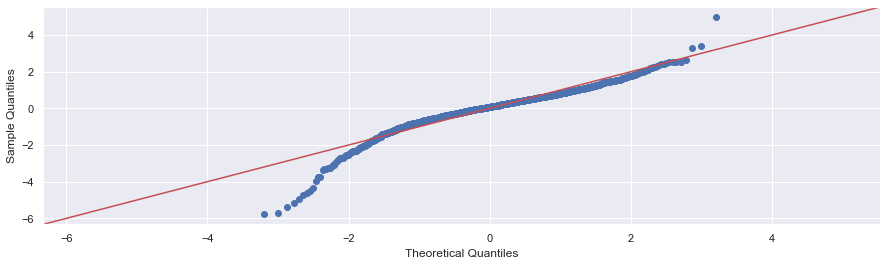

<IPython.core.display.Javascript object>

In [75]:
model5_residual = model5_fit.resid
sm.qqplot(model5_residual, line="45", fit=True, dist=stats.norm)
plt.show()

The Omnibus test and Jarque-Bera test reject the null hypothesis of normality of the residual. We will try to fix it transformin the numerical variables.
Ho: normal distribution;
Ha: non-normal distribution.

Next, let's check if the distribution of the numerical values are affecting our Condition Number result.

https://stackoverflow.com/questions/49641707/standardize-some-columns-in-python-pandas-dataframe

#### 6th try: transforming the numerical variables (standardize).

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import set_config

set_config(display="diagram")
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
)
from sklearn.compose import ColumnTransformer

# creating dataframes to modify variables
Y_model6 = pd.DataFrame()
X_model6 = pd.DataFrame()
XY_model6 = pd.DataFrame()

Y_model6["log_PrecoVenda"] = XY["log_PrecoVenda"].copy()
X_model6 = XY.copy()
X_model6 = X_model6.drop(
    [
        "log_PrecoVenda",
        "ClasseImovel",
        "ClasseZona",
        "Bairro",
        "Bairro_Others",
        "Qualidade",
        "Estrada1",
        "EstiloHabitacao",
        "AreaAlvenaria",
    ],
    axis=1,
)

# Standardizing the numerical variables (categorial variable were transformed by One Hot Encoder earlier, and variable target transformed using log)
X_model6[
    ["AreaPorao", "AnoConstrucao", "AreaConstruida", "AreaGaragem"]
] = StandardScaler().fit_transform(
    X_model6[["AreaPorao", "AnoConstrucao", "AreaConstruida", "AreaGaragem"]]
)

XY_model6 = X_model6.copy(deep=True)
XY_model6["log_PrecoVenda"] = XY["log_PrecoVenda"]

# MULTIPLE LINEAR REGRESSION MODEL
model6 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaPorao + AreaConstruida + AreaGaragem + Bairro_Crawfor + Bairro_Timber + Bairro_NridgHt + Bairro_NoRidge + Bairro_BrDale + Bairro_Veenker + Bairro_ClearCr + Bairro_StoneBr + Bairro_MeadowV",
    data=XY_model6,
)
model6_fit = model6.fit()
print(model6_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model6_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     517.8
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:08   Log-Likelihood:                 533.43
No. Observations:                1460   AIC:                            -1039.
Df Residuals:                    1446   BIC:                            -964.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.0910      0.005   1004.

<IPython.core.display.Javascript object>

Omnibus and Jarque-Bera remain rejecting H0 for normality of the residuals.

In [77]:
vif = pd.DataFrame()

vif["VIF Factor"] = [
    variance_inflation_factor(model6_fit.model.exog, i)
    for i in range(1, model6_fit.model.exog.shape[1])
]
vif["Variable"] = model6_fit.model.exog_names[1:]
print(vif)

    VIF Factor        Variable
0     1.494494   AnoConstrucao
1     1.570794       AreaPorao
2     1.515091  AreaConstruida
3     1.759926     AreaGaragem
4     1.071590  Bairro_Crawfor
5     1.048993   Bairro_Timber
6     1.219142  Bairro_NridgHt
7     1.160990  Bairro_NoRidge
8     1.024929   Bairro_BrDale
9     1.009048  Bairro_Veenker
10    1.024404  Bairro_ClearCr
11    1.053679  Bairro_StoneBr
12    1.026746  Bairro_MeadowV


<IPython.core.display.Javascript object>

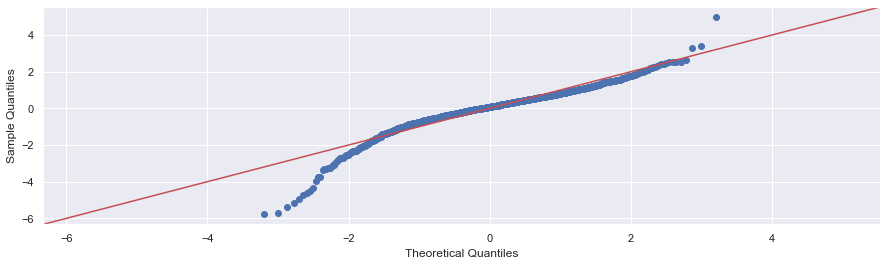

Statistics=0.927, p=0.000
Sample does not look Gaussian (reject H0)


<IPython.core.display.Javascript object>

In [78]:
from scipy import stats
from scipy.stats import shapiro

# NORMALITY #

model_residual = model6_fit.resid
model_y_adjusted = model6_fit.fittedvalues

sm.qqplot(model_residual, line="45", fit=True, dist=stats.norm)
plt.show()

# Shapiro-Wilk test
stat, p = shapiro(model_residual)
print("Statistics=%.3f, p=%.3f" % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



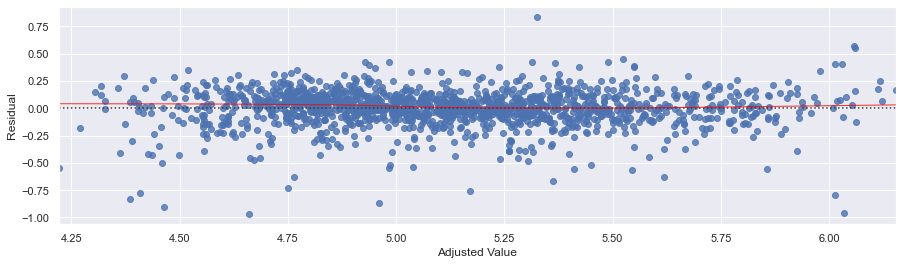

[('Breusch pagan statistic', 76.06314298304262), ('p-value', 6.031223037894664e-11)]

[('Goldfeld-Quandt - statistic', 0.8965165275219977), ('p-value', 0.9279427504308935)]

[('White’s statistic', 215.4266044324559), ('p-value', 1.144148091523049e-19)]



<IPython.core.display.Javascript object>

In [79]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white

# LINEARITY AND HOMOSCEDASTICITY PLOT

model_residual = model6_fit.resid
model_y_adjusted = model6_fit.fittedvalues
X = model6_fit.model.exog

sns.residplot(
    model_y_adjusted,
    model_residual,
    lowess=True,
    line_kws={"color": "red", "lw": 1, "alpha": 0.8},
)
plt.ylabel("Residual")
plt.xlabel("Adjusted Value")
plt.show()

# Heteroskedasticity tests

# Breush-Pagan test:

name = ["Breusch pagan statistic", "p-value"]
test = sms.het_breuschpagan(model_residual, X)
print(lzip(name, test))
print()

# Goldfeld-Quandt test

name = ["Goldfeld-Quandt - statistic", "p-value"]
test = sms.het_goldfeldquandt(model_residual, X)
print(lzip(name, test))
print()

# White’s Test
name = ["White’s statistic", "p-value"]
test = het_white(model_residual, X)
print(lzip(name, test))
print()

The tests for homoscedasticity indicate that the variance of the errors are constants (2 in 3 fail to reject H0). H0: variance of the errors are constants; Ha: variance of the errors are not constant.

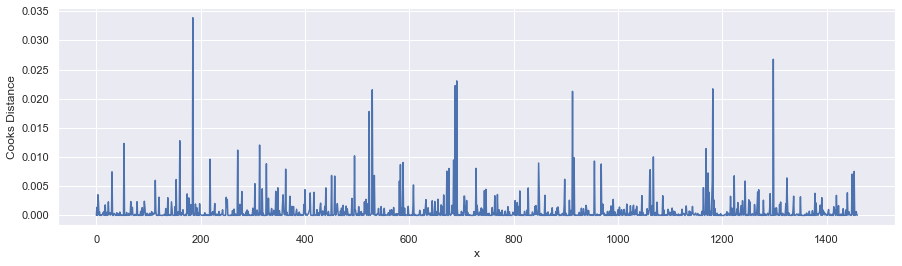

<IPython.core.display.Javascript object>

In [80]:
# Analysis for influent points

from statsmodels.graphics.regressionplots import *

influence = model6_fit.get_influence()

cooks = influence.cooks_distance
plt.plot(cooks[0])
plt.xlabel("x")
plt.ylabel("Cooks Distance")
plt.show()

In [81]:
inf_sum = influence.summary_frame().round(3)
print(inf_sum.head())

   dfb_Intercept  dfb_AnoConstrucao  dfb_AreaPorao  dfb_AreaConstruida  \
0          0.011              0.012         -0.009               0.006   
1          0.001              0.001         -0.001               0.006   
2          0.015              0.013         -0.010               0.009   
3          0.004              0.053          0.035               0.020   
4          0.003             -0.002          0.030               0.016   

   dfb_AreaGaragem  dfb_Bairro_Crawfor  dfb_Bairro_Timber  dfb_Bairro_NridgHt  \
0            0.000              -0.000             -0.003              -0.004   
1            0.003              -0.001             -0.001              -0.002   
2            0.004              -0.001             -0.004              -0.007   
3           -0.079              -0.191             -0.003              -0.005   
4           -0.033              -0.005             -0.001              -0.002   

   dfb_Bairro_NoRidge  dfb_Bairro_BrDale  dfb_Bairro_Veenker  \
0   

<IPython.core.display.Javascript object>

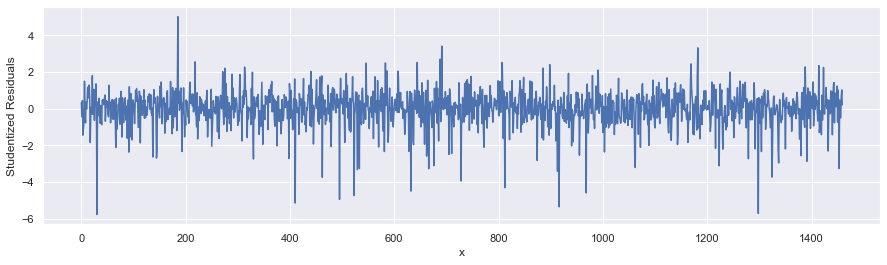

<IPython.core.display.Javascript object>

In [82]:
student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.xlabel("x")
plt.ylabel("Studentized Residuals")
plt.show()

In [83]:
np.where(student_resid < -3)

(array([  30,  410,  462,  495,  523,  529,  533,  632,  666,  676,  728,
         812,  913,  916,  968, 1062, 1223, 1298, 1324, 1453], dtype=int64),)

<IPython.core.display.Javascript object>

In [84]:
np.where(student_resid > 3)

(array([ 185,  691, 1182], dtype=int64),)

<IPython.core.display.Javascript object>

In [85]:
XY_model6 = XY_model6.drop(
    labels=[
        30,
        185,
        410,
        462,
        495,
        523,
        529,
        533,
        632,
        666,
        676,
        691,
        728,
        812,
        913,
        916,
        968,
        1062,
        1182,
        1223,
        1298,
        1324,
        1453,
    ],
    axis=0,
)

<IPython.core.display.Javascript object>

In [86]:
XY_model6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AnoConstrucao   1437 non-null   float64
 1   AreaPorao       1437 non-null   float64
 2   AreaConstruida  1437 non-null   float64
 3   AreaGaragem     1437 non-null   float64
 4   Bairro_Crawfor  1437 non-null   int64  
 5   Bairro_Timber   1437 non-null   int64  
 6   Bairro_NridgHt  1437 non-null   int64  
 7   Bairro_NoRidge  1437 non-null   int64  
 8   Bairro_BrDale   1437 non-null   int64  
 9   Bairro_Veenker  1437 non-null   int64  
 10  Bairro_ClearCr  1437 non-null   int64  
 11  Bairro_StoneBr  1437 non-null   int64  
 12  Bairro_MeadowV  1437 non-null   int64  
 13  log_PrecoVenda  1437 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 168.4 KB


<IPython.core.display.Javascript object>

In [87]:
# MULTIPLE LINEAR REGRESSION MODEL
model6 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaPorao + AreaConstruida + AreaGaragem + Bairro_Crawfor + Bairro_Timber + Bairro_NridgHt + Bairro_NoRidge + Bairro_BrDale + Bairro_Veenker + Bairro_ClearCr + Bairro_StoneBr + Bairro_MeadowV",
    data=XY_model6,
)
model6_fit = model6.fit()
print(model6_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model6_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     670.2
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:12   Log-Likelihood:                 751.29
No. Observations:                1437   AIC:                            -1475.
Df Residuals:                    1423   BIC:                            -1401.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.1017      0.004   1166.

<IPython.core.display.Javascript object>

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



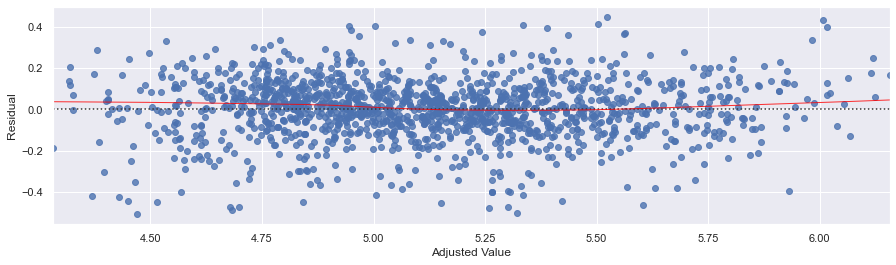

[('Breusch pagan statistic', 119.93772143961255), ('p-value', 2.071242041974952e-19)]

[('Goldfeld-Quandt - statistic', 0.9819596788908702), ('p-value', 0.5954150254565547)]

[('White’s statistic', 193.41762063009526), ('p-value', 3.321141070431054e-16)]



<IPython.core.display.Javascript object>

In [88]:
# LINEARITY AND HOMOSCEDASTICITY PLOT

model_residual = model6_fit.resid
model_y_adjusted = model6_fit.fittedvalues
X = model6_fit.model.exog

sns.residplot(
    model_y_adjusted,
    model_residual,
    lowess=True,
    line_kws={"color": "red", "lw": 1, "alpha": 0.8},
)
plt.ylabel("Residual")
plt.xlabel("Adjusted Value")
plt.show()

# Heteroskedasticity tests

# Breush-Pagan test:

name = ["Breusch pagan statistic", "p-value"]
test = sms.het_breuschpagan(model_residual, X)
print(lzip(name, test))
print()

# Goldfeld-Quandt test

name = ["Goldfeld-Quandt - statistic", "p-value"]
test = sms.het_goldfeldquandt(model_residual, X)
print(lzip(name, test))
print()

# White’s Test
name = ["White’s statistic", "p-value"]
test = het_white(model_residual, X)
print(lzip(name, test))
print()

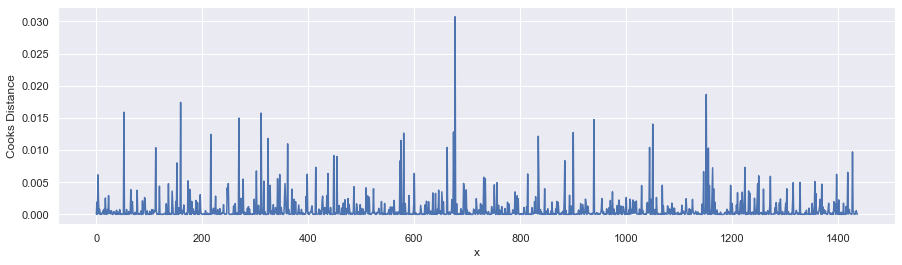

<IPython.core.display.Javascript object>

In [89]:
# Analysis for influent points

from statsmodels.graphics.regressionplots import *

influence = model6_fit.get_influence()

cooks = influence.cooks_distance
plt.plot(cooks[0])
plt.xlabel("x")
plt.ylabel("Cooks Distance")
plt.show()

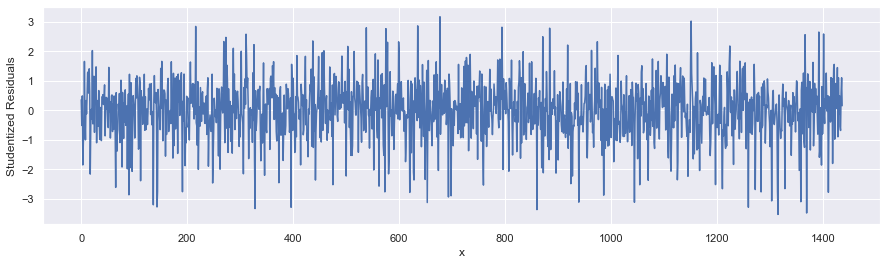

<IPython.core.display.Javascript object>

In [90]:
student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.xlabel("x")
plt.ylabel("Studentized Residuals")
plt.show()

In [91]:
np.where(student_resid < -3)

(array([ 136,  143,  328,  396,  653,  860,  939, 1044, 1259, 1303, 1315,
        1358, 1369], dtype=int64),)

<IPython.core.display.Javascript object>

In [92]:
np.where(student_resid > 3)

(array([ 677, 1151], dtype=int64),)

<IPython.core.display.Javascript object>

In [93]:
XY_model6 = XY_model6.drop(
    labels=[
        136,
        143,
        328,
        396,
        653,
        677,
        860,
        939,
        1044,
        1259,
        1303,
        1315,
        1358,
        1369,
        1151,
    ],
    axis=0,
)

<IPython.core.display.Javascript object>

In [94]:
XY_model6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AnoConstrucao   1422 non-null   float64
 1   AreaPorao       1422 non-null   float64
 2   AreaConstruida  1422 non-null   float64
 3   AreaGaragem     1422 non-null   float64
 4   Bairro_Crawfor  1422 non-null   int64  
 5   Bairro_Timber   1422 non-null   int64  
 6   Bairro_NridgHt  1422 non-null   int64  
 7   Bairro_NoRidge  1422 non-null   int64  
 8   Bairro_BrDale   1422 non-null   int64  
 9   Bairro_Veenker  1422 non-null   int64  
 10  Bairro_ClearCr  1422 non-null   int64  
 11  Bairro_StoneBr  1422 non-null   int64  
 12  Bairro_MeadowV  1422 non-null   int64  
 13  log_PrecoVenda  1422 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 166.6 KB


<IPython.core.display.Javascript object>

In [95]:
# MULTIPLE LINEAR REGRESSION MODEL
model6 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaPorao + AreaConstruida + AreaGaragem + Bairro_Crawfor + Bairro_Timber + Bairro_NridgHt + Bairro_NoRidge + Bairro_BrDale + Bairro_Veenker + Bairro_ClearCr + Bairro_StoneBr + Bairro_MeadowV",
    data=XY_model6,
)
model6_fit = model6.fit()
print(model6_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model6_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     666.9
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:14   Log-Likelihood:                 743.36
No. Observations:                1422   AIC:                            -1459.
Df Residuals:                    1408   BIC:                            -1385.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.1015      0.004   1158.

<IPython.core.display.Javascript object>

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



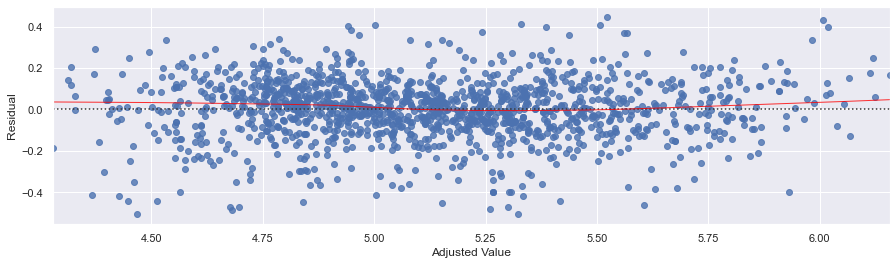

[('Breusch pagan statistic', 117.94586324274444), ('p-value', 5.122337365320912e-19)]

[('Goldfeld-Quandt - statistic', 0.9895484609367643), ('p-value', 0.5551327830124964)]

[('White’s statistic', 193.95006402826277), ('p-value', 2.7492610265875976e-16)]



<IPython.core.display.Javascript object>

In [96]:
# LINEARITY AND HOMOSCEDASTICITY PLOT

model_residual = model6_fit.resid
model_y_adjusted = model6_fit.fittedvalues
X = model6_fit.model.exog

sns.residplot(
    model_y_adjusted,
    model_residual,
    lowess=True,
    line_kws={"color": "red", "lw": 1, "alpha": 0.8},
)
plt.ylabel("Residual")
plt.xlabel("Adjusted Value")
plt.show()

# Heteroskedasticity tests

# Breush-Pagan test:

name = ["Breusch pagan statistic", "p-value"]
test = sms.het_breuschpagan(model_residual, X)
print(lzip(name, test))
print()

# Goldfeld-Quandt test

name = ["Goldfeld-Quandt - statistic", "p-value"]
test = sms.het_goldfeldquandt(model_residual, X)
print(lzip(name, test))
print()

# White’s Test
name = ["White’s statistic", "p-value"]
test = het_white(model_residual, X)
print(lzip(name, test))
print()

In [97]:
fig = px.box(XY_model6["log_PrecoVenda"])
fig.show()

<IPython.core.display.Javascript object>

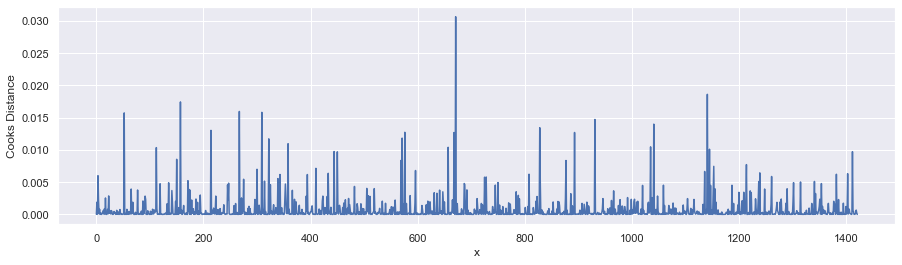

<IPython.core.display.Javascript object>

In [98]:
# Analysis for influent points

from statsmodels.graphics.regressionplots import *

influence = model6_fit.get_influence()

cooks = influence.cooks_distance
plt.plot(cooks[0])
plt.xlabel("x")
plt.ylabel("Cooks Distance")
plt.show()

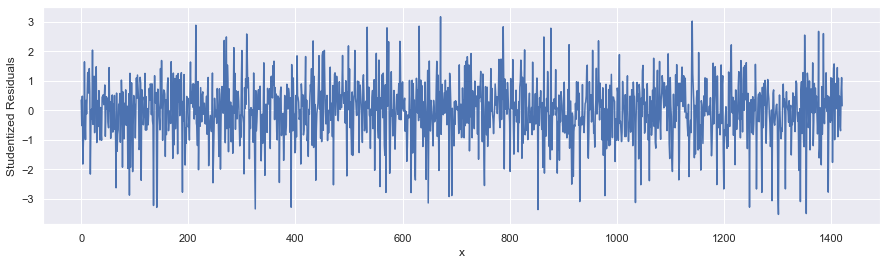

<IPython.core.display.Javascript object>

In [99]:
student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.xlabel("x")
plt.ylabel("Studentized Residuals")
plt.show()

In [100]:
np.where(student_resid < -3)

(array([ 135,  141,  325,  392,  648,  853,  931, 1035, 1248, 1290, 1302,
        1343, 1354], dtype=int64),)

<IPython.core.display.Javascript object>

In [101]:
np.where(student_resid > 3)

(array([ 671, 1141], dtype=int64),)

<IPython.core.display.Javascript object>

In [102]:
XY_model6 = XY_model6.drop(
    labels=[
        135,
        141,
        325,
        392,
        648,
        853,
        931,
        1035,
        1248,
        1290,
        1302,
        1343,
        1354,
        671,
        1141,
    ],
    axis=0,
)

<IPython.core.display.Javascript object>

In [103]:
XY_model6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AnoConstrucao   1407 non-null   float64
 1   AreaPorao       1407 non-null   float64
 2   AreaConstruida  1407 non-null   float64
 3   AreaGaragem     1407 non-null   float64
 4   Bairro_Crawfor  1407 non-null   int64  
 5   Bairro_Timber   1407 non-null   int64  
 6   Bairro_NridgHt  1407 non-null   int64  
 7   Bairro_NoRidge  1407 non-null   int64  
 8   Bairro_BrDale   1407 non-null   int64  
 9   Bairro_Veenker  1407 non-null   int64  
 10  Bairro_ClearCr  1407 non-null   int64  
 11  Bairro_StoneBr  1407 non-null   int64  
 12  Bairro_MeadowV  1407 non-null   int64  
 13  log_PrecoVenda  1407 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 164.9 KB


<IPython.core.display.Javascript object>

In [104]:
XY_model6.drop(
    XY_model6[XY_model6["log_PrecoVenda"] < 4.166665].index, inplace=True,
)

<IPython.core.display.Javascript object>

In [105]:
XY_model6.drop(
    XY_model6[XY_model6["log_PrecoVenda"] > 6.100904].index, inplace=True,
)

<IPython.core.display.Javascript object>

In [106]:
XY_model6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AnoConstrucao   1388 non-null   float64
 1   AreaPorao       1388 non-null   float64
 2   AreaConstruida  1388 non-null   float64
 3   AreaGaragem     1388 non-null   float64
 4   Bairro_Crawfor  1388 non-null   int64  
 5   Bairro_Timber   1388 non-null   int64  
 6   Bairro_NridgHt  1388 non-null   int64  
 7   Bairro_NoRidge  1388 non-null   int64  
 8   Bairro_BrDale   1388 non-null   int64  
 9   Bairro_Veenker  1388 non-null   int64  
 10  Bairro_ClearCr  1388 non-null   int64  
 11  Bairro_StoneBr  1388 non-null   int64  
 12  Bairro_MeadowV  1388 non-null   int64  
 13  log_PrecoVenda  1388 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 162.7 KB


<IPython.core.display.Javascript object>

In [107]:
fig = px.box(XY_model6["log_PrecoVenda"])
fig.show()

<IPython.core.display.Javascript object>

In [108]:
# MULTIPLE LINEAR REGRESSION MODEL
model6 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaPorao + AreaConstruida + AreaGaragem + Bairro_Crawfor + Bairro_Timber + Bairro_NridgHt + Bairro_NoRidge + Bairro_BrDale + Bairro_Veenker + Bairro_ClearCr + Bairro_StoneBr + Bairro_MeadowV",
    data=XY_model6,
)
model6_fit = model6.fit()
print(model6_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model6_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     611.6
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:16   Log-Likelihood:                 764.65
No. Observations:                1388   AIC:                            -1501.
Df Residuals:                    1374   BIC:                            -1428.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.1027      0.004   1182.

<IPython.core.display.Javascript object>

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



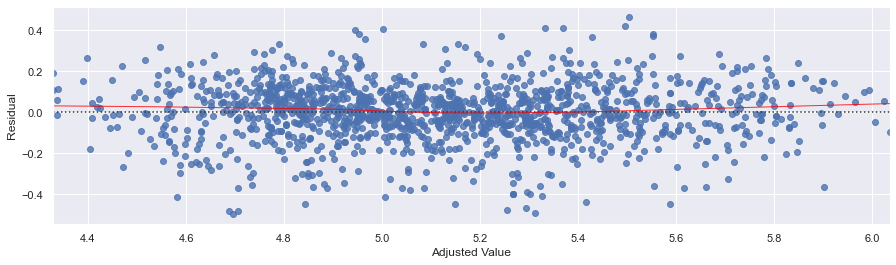

[('Breusch pagan statistic', 121.6729139345577), ('p-value', 9.400411342486325e-20)]

[('Goldfeld-Quandt - statistic', 0.944076762173254), ('p-value', 0.7733738486742217)]

[('White’s statistic', 189.45982730148873), ('p-value', 1.3442180857668209e-15)]



<IPython.core.display.Javascript object>

In [109]:
# LINEARITY AND HOMOSCEDASTICITY PLOT

model_residual = model6_fit.resid
model_y_adjusted = model6_fit.fittedvalues
X = model6_fit.model.exog

sns.residplot(
    model_y_adjusted,
    model_residual,
    lowess=True,
    line_kws={"color": "red", "lw": 1, "alpha": 0.8},
)
plt.ylabel("Residual")
plt.xlabel("Adjusted Value")
plt.show()

# Heteroskedasticity tests

# Breush-Pagan test:

name = ["Breusch pagan statistic", "p-value"]
test = sms.het_breuschpagan(model_residual, X)
print(lzip(name, test))
print()

# Goldfeld-Quandt test

name = ["Goldfeld-Quandt - statistic", "p-value"]
test = sms.het_goldfeldquandt(model_residual, X)
print(lzip(name, test))
print()

# White’s Test
name = ["White’s statistic", "p-value"]
test = het_white(model_residual, X)
print(lzip(name, test))
print()

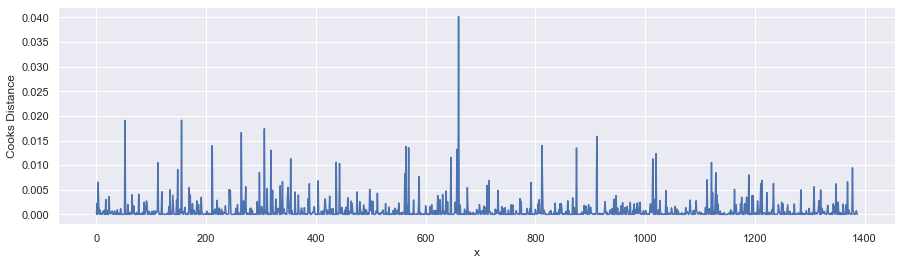

<IPython.core.display.Javascript object>

In [110]:
# Analysis for influent points

from statsmodels.graphics.regressionplots import *

influence = model6_fit.get_influence()

cooks = influence.cooks_distance
plt.plot(cooks[0])
plt.xlabel("x")
plt.ylabel("Cooks Distance")
plt.show()

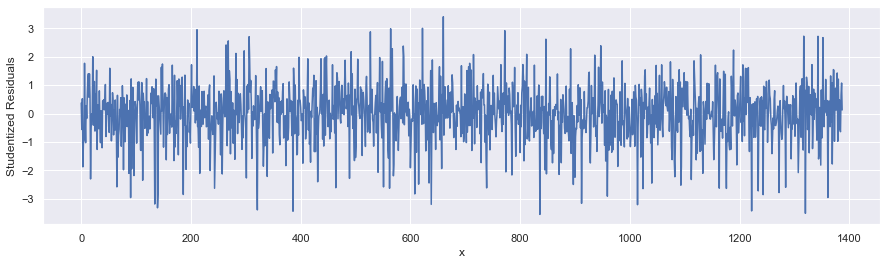

<IPython.core.display.Javascript object>

In [111]:
student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.xlabel("x")
plt.ylabel("Studentized Residuals")
plt.show()

In [112]:
np.where(student_resid < -3)

(array([ 134,  139,  321,  386,  638,  836,  912, 1014, 1222, 1320],
       dtype=int64),)

<IPython.core.display.Javascript object>

In [113]:
np.where(student_resid > 3)

(array([622, 660], dtype=int64),)

<IPython.core.display.Javascript object>

In [114]:
XY_model6 = XY_model6.drop(
    labels=[134, 139, 321, 386, 638, 836, 912, 1014, 1222, 1320, 622, 660], axis=0,
)

<IPython.core.display.Javascript object>

In [115]:
# MULTIPLE LINEAR REGRESSION MODEL
model6 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaPorao + AreaConstruida + AreaGaragem + Bairro_Crawfor + Bairro_Timber + Bairro_NridgHt + Bairro_NoRidge + Bairro_BrDale + Bairro_Veenker + Bairro_ClearCr + Bairro_StoneBr + Bairro_MeadowV",
    data=XY_model6,
)
model6_fit = model6.fit()
print(model6_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model6_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     601.2
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:17   Log-Likelihood:                 755.91
No. Observations:                1376   AIC:                            -1484.
Df Residuals:                    1362   BIC:                            -1411.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.1032      0.004   1175.

<IPython.core.display.Javascript object>

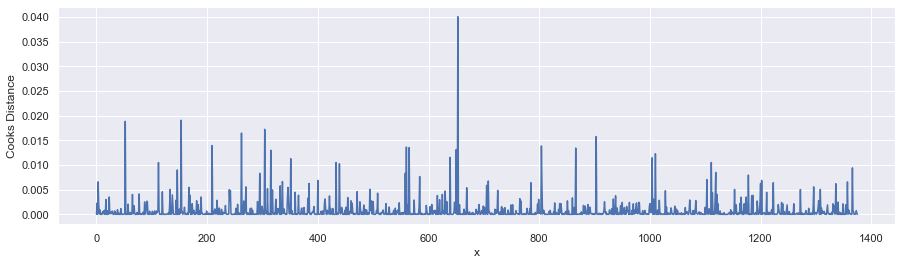

<IPython.core.display.Javascript object>

In [116]:
# Analysis for influent points

from statsmodels.graphics.regressionplots import *

influence = model6_fit.get_influence()

cooks = influence.cooks_distance
plt.plot(cooks[0])
plt.xlabel("x")
plt.ylabel("Cooks Distance")
plt.show()

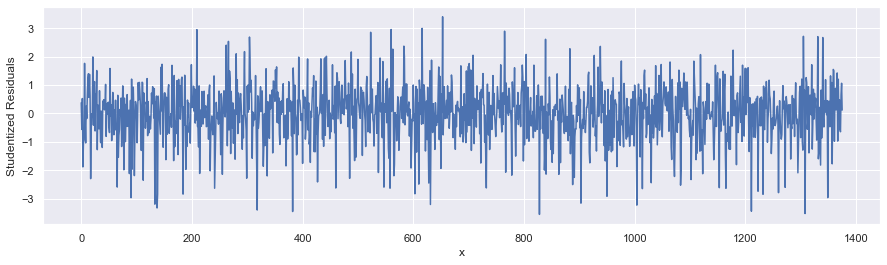

<IPython.core.display.Javascript object>

In [117]:
student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.xlabel("x")
plt.ylabel("Studentized Residuals")
plt.show()

In [118]:
np.where(student_resid < -3)

(array([ 133,  137,  318,  382,  631,  828,  903, 1004, 1211, 1308],
       dtype=int64),)

<IPython.core.display.Javascript object>

In [119]:
np.where(student_resid > 3)

(array([653], dtype=int64),)

<IPython.core.display.Javascript object>

In [120]:
XY_model6 = XY_model6.drop(
    labels=[133, 137, 318, 382, 631, 828, 903, 1004, 1211, 1308], axis=0,
)

<IPython.core.display.Javascript object>

In [121]:
# MULTIPLE LINEAR REGRESSION MODEL
model6 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaPorao + AreaConstruida + AreaGaragem + Bairro_Crawfor + Bairro_Timber + Bairro_NridgHt + Bairro_NoRidge + Bairro_BrDale + Bairro_Veenker + Bairro_ClearCr + Bairro_StoneBr + Bairro_MeadowV",
    data=XY_model6,
)
model6_fit = model6.fit()
print(model6_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model6_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     604.7
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:18   Log-Likelihood:                 755.09
No. Observations:                1366   AIC:                            -1482.
Df Residuals:                    1352   BIC:                            -1409.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.1039      0.004   1175.

<IPython.core.display.Javascript object>

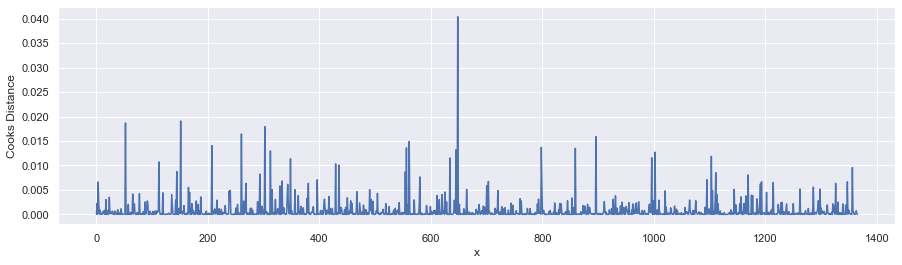

<IPython.core.display.Javascript object>

In [122]:
# Analysis for influent points

from statsmodels.graphics.regressionplots import *

influence = model6_fit.get_influence()

cooks = influence.cooks_distance
plt.plot(cooks[0])
plt.xlabel("x")
plt.ylabel("Cooks Distance")
plt.show()

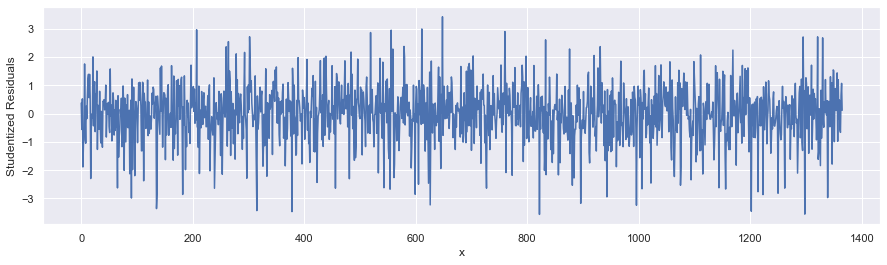

<IPython.core.display.Javascript object>

In [123]:
student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.xlabel("x")
plt.ylabel("Studentized Residuals")
plt.show()

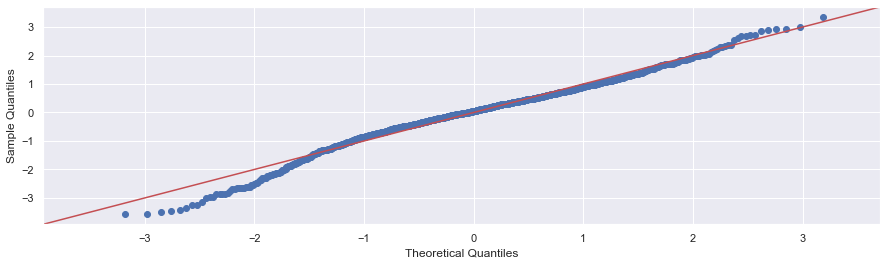

Statistics=0.981, p=0.000
Sample does not look Gaussian (reject H0)


<IPython.core.display.Javascript object>

In [124]:
from scipy import stats
from scipy.stats import shapiro

# NORMALITY #

model_residual = model6_fit.resid
model_y_adjusted = model6_fit.fittedvalues

sm.qqplot(model_residual, line="45", fit=True, dist=stats.norm)
plt.show()

# Shapiro-Wilk test
stat, p = shapiro(model_residual)
print("Statistics=%.3f, p=%.3f" % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

In [125]:
np.where(student_resid < -3)

(array([ 135,  315,  378,  626,  822,  896,  996, 1202, 1298], dtype=int64),)

<IPython.core.display.Javascript object>

In [126]:
np.where(student_resid > 3)

(array([648], dtype=int64),)

<IPython.core.display.Javascript object>

In [127]:
XY_model6 = XY_model6.drop(labels=[315, 378, 626, 822, 896, 996, 1202], axis=0,)

<IPython.core.display.Javascript object>

In [128]:
# MULTIPLE LINEAR REGRESSION MODEL
model6 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaPorao + AreaConstruida + AreaGaragem + Bairro_Crawfor + Bairro_Timber + Bairro_NridgHt + Bairro_NoRidge + Bairro_BrDale + Bairro_Veenker + Bairro_ClearCr + Bairro_StoneBr + Bairro_MeadowV",
    data=XY_model6,
)
model6_fit = model6.fit()
print(model6_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model6_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     598.3
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:19   Log-Likelihood:                 749.28
No. Observations:                1359   AIC:                            -1471.
Df Residuals:                    1345   BIC:                            -1398.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.1036      0.004   1170.

<IPython.core.display.Javascript object>

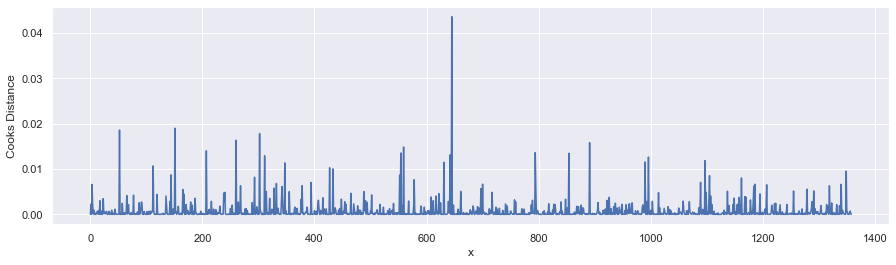

<IPython.core.display.Javascript object>

In [129]:
# Analysis for influent points

from statsmodels.graphics.regressionplots import *

influence = model6_fit.get_influence()

cooks = influence.cooks_distance
plt.plot(cooks[0])
plt.xlabel("x")
plt.ylabel("Cooks Distance")
plt.show()

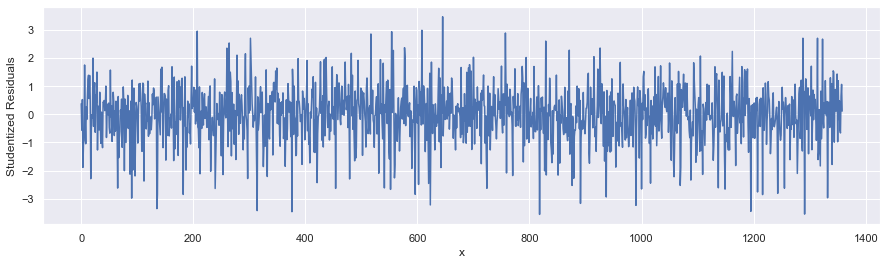

<IPython.core.display.Javascript object>

In [130]:
student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.xlabel("x")
plt.ylabel("Studentized Residuals")
plt.show()

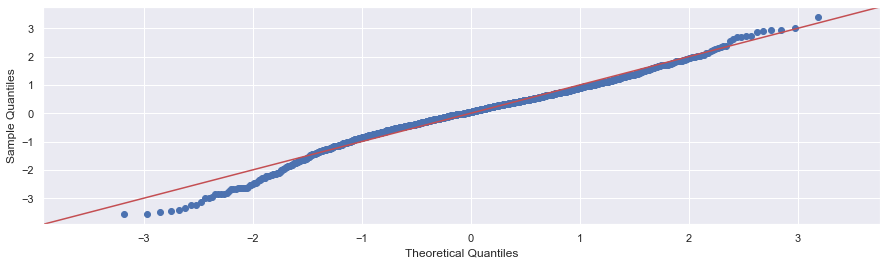

Statistics=0.981, p=0.000
Sample does not look Gaussian (reject H0)


<IPython.core.display.Javascript object>

In [131]:
from scipy import stats
from scipy.stats import shapiro

# NORMALITY #

model_residual = model6_fit.resid
model_y_adjusted = model6_fit.fittedvalues

sm.qqplot(model_residual, line="45", fit=True, dist=stats.norm)
plt.show()

# Shapiro-Wilk test
stat, p = shapiro(model_residual)
print("Statistics=%.3f, p=%.3f" % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

In [132]:
np.where(student_resid < -3)

(array([ 135,  314,  376,  623,  818,  891,  990, 1195, 1291], dtype=int64),)

<IPython.core.display.Javascript object>

In [133]:
np.where(student_resid > 3)

(array([645], dtype=int64),)

<IPython.core.display.Javascript object>

In [134]:
XY_model6 = XY_model6.drop(
    labels=[314, 376, 623, 645, 818, 891, 990, 1195, 1291], axis=0,
)

<IPython.core.display.Javascript object>

In [135]:
# MULTIPLE LINEAR REGRESSION MODEL
model6 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaPorao + AreaConstruida + AreaGaragem + Bairro_Crawfor + Bairro_Timber + Bairro_NridgHt + Bairro_NoRidge + Bairro_BrDale + Bairro_Veenker + Bairro_ClearCr + Bairro_StoneBr + Bairro_MeadowV",
    data=XY_model6,
)
model6_fit = model6.fit()
print(model6_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model6_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     593.8
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:20   Log-Likelihood:                 741.99
No. Observations:                1350   AIC:                            -1456.
Df Residuals:                    1336   BIC:                            -1383.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.1034      0.004   1165.

<IPython.core.display.Javascript object>

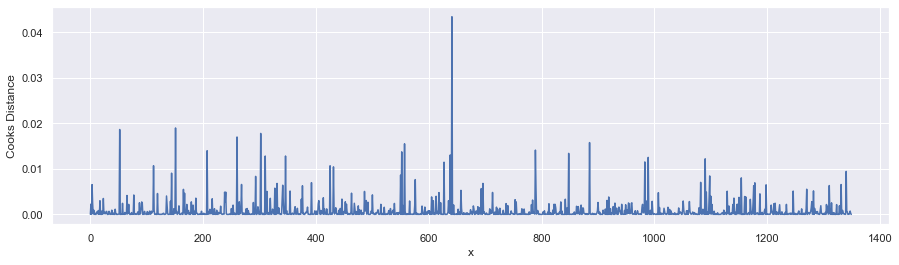

<IPython.core.display.Javascript object>

In [136]:
# Analysis for influent points

from statsmodels.graphics.regressionplots import *

influence = model6_fit.get_influence()

cooks = influence.cooks_distance
plt.plot(cooks[0])
plt.xlabel("x")
plt.ylabel("Cooks Distance")
plt.show()

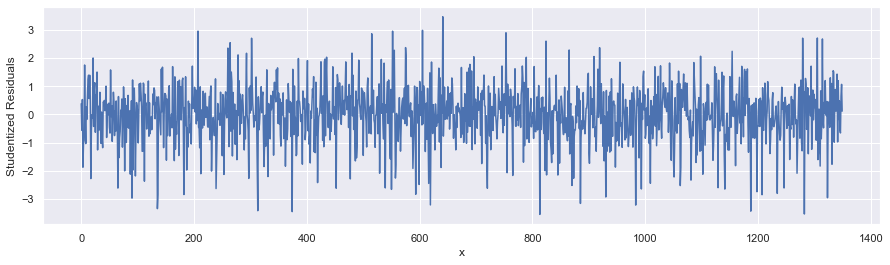

<IPython.core.display.Javascript object>

In [137]:
student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.xlabel("x")
plt.ylabel("Studentized Residuals")
plt.show()

In [138]:
np.where(student_resid < -3)

(array([ 135,  313,  374,  619,  813,  885,  983, 1187, 1282], dtype=int64),)

<IPython.core.display.Javascript object>

In [139]:
np.where(student_resid > 3)

(array([641], dtype=int64),)

<IPython.core.display.Javascript object>

In [140]:
XY_model6.iloc[[135, 313, 374, 619, 641, 813, 885, 983, 1187, 1282]]

AnoConstrucao  AreaPorao  AreaConstruida  AreaGaragem  Bairro_Crawfor  \
144       -0.275742   1.703727        0.466041     0.160984               0   
330       -0.242518   1.703727        0.466041    -0.573192               0   
398       -1.704405  -0.224370       -0.886796    -0.640814               0   
662       -0.109619   0.859085       -0.232197     0.508752               0   
688        1.186145   0.926958       -0.176089     0.465281               0   
874       -1.006686  -0.940808       -0.774579    -1.307368               0   
955       -0.840562  -0.179121        0.944002     0.103023               1   
1061      -1.206034  -0.392796       -1.267087     2.258458               0   
1279      -1.704405  -0.885504       -0.780814     0.276907               0   
1391      -0.142843   1.341737        0.166796     1.552055               0   

      Bairro_Timber  Bairro_NridgHt  Bairro_NoRidge  Bairro_BrDale  \
144               0               0               0              0   
330               0               0               0              0   
398               0               0               0              0   
662               0               0               0              0   
688               0               0               0              0   
874               0               0               0              0   
955               0               0               0              0   
1061              0               0               0              0   
1279              0               0               0              0   
1391              0               0               0              0   

      Bairro_Veenker  Bairro_ClearCr  Bairro_StoneBr  Bairro_MeadowV  \
144                0               0               0               0   
330                0               0               0               0   
398                0               0               0               0   
662                0               0               0               0   
688                0               0               1               0   
874                0               0               0               0   
955                0               0               0               0   
1061               0               0               0               0   
1279               0               0               0               0   
1391               0               0               0               0   

      log_PrecoVenda  
144         4.828314  
330         4.779123  
398         4.204693  
662         4.700480  
688         5.971262  
874         4.197202  
955         4.976734  
1061        4.394449  
1279        4.225373  
1391        4.820282

<IPython.core.display.Javascript object>

In [141]:
XY_model6 = XY_model6.drop(
    labels=[144, 330, 398, 662, 688, 874, 955, 1061, 1279, 1391], axis=0,
)

<IPython.core.display.Javascript object>

In [142]:
# MULTIPLE LINEAR REGRESSION MODEL
model6 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaPorao + AreaConstruida + AreaGaragem + Bairro_Crawfor + Bairro_Timber + Bairro_NridgHt + Bairro_NoRidge + Bairro_BrDale + Bairro_Veenker + Bairro_ClearCr + Bairro_StoneBr + Bairro_MeadowV",
    data=XY_model6,
)
model6_fit = model6.fit()
print(model6_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model6_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     636.9
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:21   Log-Likelihood:                 792.24
No. Observations:                1340   AIC:                            -1556.
Df Residuals:                    1326   BIC:                            -1484.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.1072      0.004   1211.

<IPython.core.display.Javascript object>

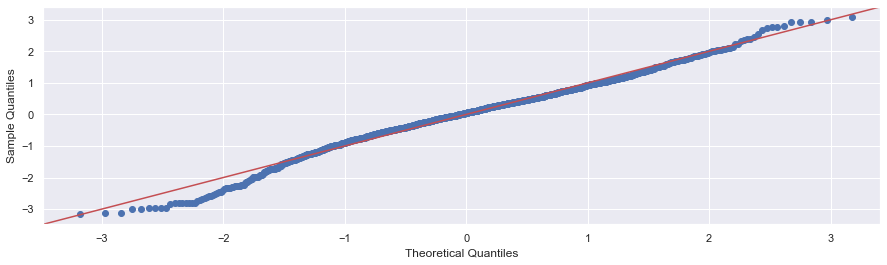

Statistics=0.987, p=0.000
Sample does not look Gaussian (reject H0)


<IPython.core.display.Javascript object>

In [143]:
from scipy import stats
from scipy.stats import shapiro

# NORMALITY #

model_residual = model6_fit.resid
model_y_adjusted = model6_fit.fittedvalues

sm.qqplot(model_residual, line="45", fit=True, dist=stats.norm)
plt.show()

# Shapiro-Wilk test
stat, p = shapiro(model_residual)
print("Statistics=%.3f, p=%.3f" % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

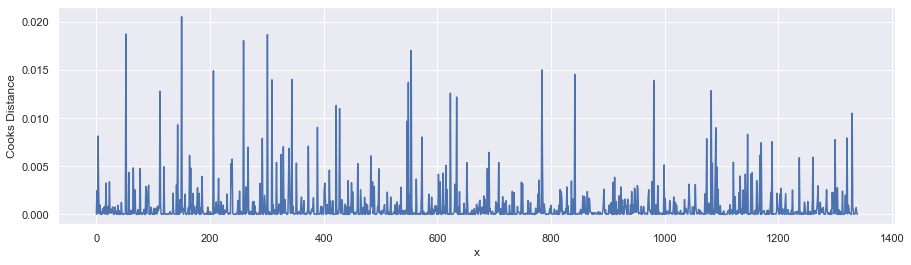

<IPython.core.display.Javascript object>

In [144]:
# Analysis for influent points

from statsmodels.graphics.regressionplots import *

influence = model6_fit.get_influence()

cooks = influence.cooks_distance
plt.plot(cooks[0])
plt.xlabel("x")
plt.ylabel("Cooks Distance")
plt.show()

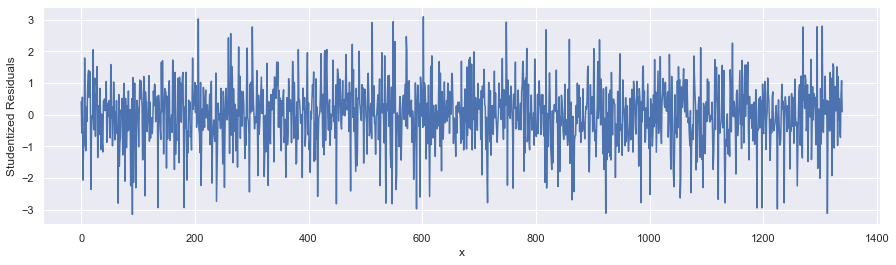

<IPython.core.display.Javascript object>

In [145]:
student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.xlabel("x")
plt.ylabel("Studentized Residuals")
plt.show()

In [146]:
np.where(student_resid < -3)

(array([  90,  923, 1313], dtype=int64),)

<IPython.core.display.Javascript object>

In [147]:
np.where(student_resid > 3)

(array([206, 602], dtype=int64),)

<IPython.core.display.Javascript object>

In [148]:
XY_model6.iloc[[90, 206, 602, 923, 1313]]

AnoConstrucao  AreaPorao  AreaConstruida  AreaGaragem  Bairro_Crawfor  \
91        -0.342192   0.464415       -0.558458     0.045061               0   
218       -1.073135  -0.634122        0.935690    -0.191614               1   
644        1.252594   1.799252        0.545009     0.035401               0   
1003       0.156179   1.583064        0.366293     0.276907               0   
1432      -1.471832  -0.991084       -1.113308    -1.230087               0   

      Bairro_Timber  Bairro_NridgHt  Bairro_NoRidge  Bairro_BrDale  \
91                0               0               0              0   
218               0               0               0              0   
644               0               0               0              0   
1003              0               0               0              0   
1432              0               0               0              0   

      Bairro_Veenker  Bairro_ClearCr  Bairro_StoneBr  Bairro_MeadowV  \
91                 0               0               0               0   
218                0               0               0               0   
644                0               0               0               0   
1003               0               0               0               0   
1432               0               0               0               0   

      log_PrecoVenda  
91          4.591071  
218         5.741399  
644         5.915873  
1003        4.919287  
1432        4.166665

<IPython.core.display.Javascript object>

In [149]:
XY_model6 = XY_model6.drop(labels=[91, 218, 644, 1003, 1432], axis=0,)

<IPython.core.display.Javascript object>

In [150]:
# MULTIPLE LINEAR REGRESSION MODEL
model6 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaPorao + AreaConstruida + AreaGaragem + Bairro_Crawfor + Bairro_Timber + Bairro_NridgHt + Bairro_NoRidge + Bairro_BrDale + Bairro_Veenker + Bairro_ClearCr + Bairro_StoneBr + Bairro_MeadowV",
    data=XY_model6,
)
model6_fit = model6.fit()
print(model6_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model6_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     652.3
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:22   Log-Likelihood:                 811.44
No. Observations:                1335   AIC:                            -1595.
Df Residuals:                    1321   BIC:                            -1522.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.1079      0.004   1228.

<IPython.core.display.Javascript object>

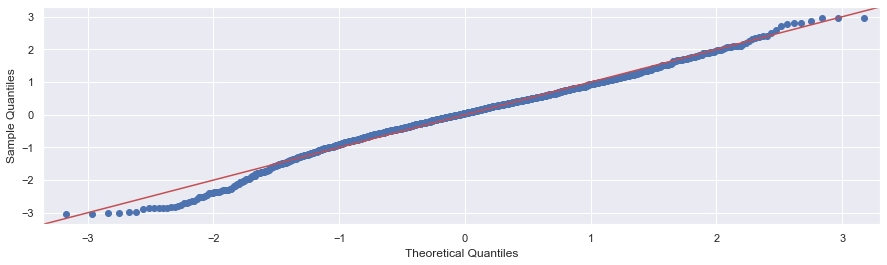

Statistics=0.988, p=0.000
Sample does not look Gaussian (reject H0)


<IPython.core.display.Javascript object>

In [151]:
from scipy import stats
from scipy.stats import shapiro

# NORMALITY #

model_residual = model6_fit.resid
model_y_adjusted = model6_fit.fittedvalues

sm.qqplot(model_residual, line="45", fit=True, dist=stats.norm)
plt.show()

# Shapiro-Wilk test
stat, p = shapiro(model_residual)
print("Statistics=%.3f, p=%.3f" % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

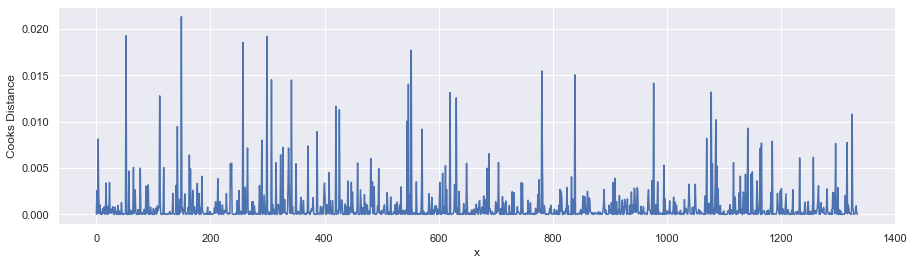

<IPython.core.display.Javascript object>

In [152]:
# Analysis for influent points

from statsmodels.graphics.regressionplots import *

influence = model6_fit.get_influence()

cooks = influence.cooks_distance
plt.plot(cooks[0])
plt.xlabel("x")
plt.ylabel("Cooks Distance")
plt.show()

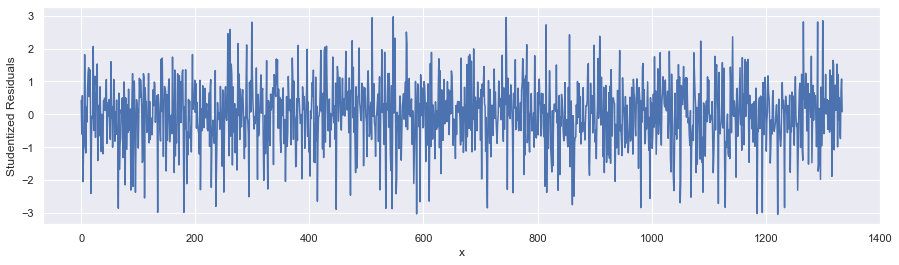

<IPython.core.display.Javascript object>

In [153]:
student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.xlabel("x")
plt.ylabel("Studentized Residuals")
plt.show()

In [154]:
np.where(student_resid < -3)

(array([ 588, 1185, 1221], dtype=int64),)

<IPython.core.display.Javascript object>

In [155]:
np.where(student_resid > 3)

(array([], dtype=int64),)

<IPython.core.display.Javascript object>

In [156]:
XY_model6.iloc[[588, 1185, 1221]]

AnoConstrucao  AreaPorao  AreaConstruida  AreaGaragem  Bairro_Crawfor  \
628       -0.076394  -0.025779        1.197530     0.160984               0   
1292      -2.634696  -0.141414        1.804332    -0.186784               0   
1336       0.056505   1.522732        0.316419     0.170644               0   

      Bairro_Timber  Bairro_NridgHt  Bairro_NoRidge  Bairro_BrDale  \
628               0               0               0              0   
1292              0               0               0              0   
1336              0               0               0              0   

      Bairro_Veenker  Bairro_ClearCr  Bairro_StoneBr  Bairro_MeadowV  \
628                0               0               0               0   
1292               0               0               0               0   
1336               0               0               0               0   

      log_PrecoVenda  
628         4.905275  
1292        4.677491  
1336        4.905275

<IPython.core.display.Javascript object>

In [157]:
XY_model6 = XY_model6.drop(labels=[628, 1292, 1336], axis=0,)

<IPython.core.display.Javascript object>

In [158]:
# MULTIPLE LINEAR REGRESSION MODEL
model6 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaPorao + AreaConstruida + AreaGaragem + Bairro_Crawfor + Bairro_Timber + Bairro_NridgHt + Bairro_NoRidge + Bairro_BrDale + Bairro_Veenker + Bairro_ClearCr + Bairro_StoneBr + Bairro_MeadowV",
    data=XY_model6,
)
model6_fit = model6.fit()
print(model6_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model6_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     665.6
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:23   Log-Likelihood:                 822.21
No. Observations:                1332   AIC:                            -1616.
Df Residuals:                    1318   BIC:                            -1544.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.1093      0.004   1238.

<IPython.core.display.Javascript object>

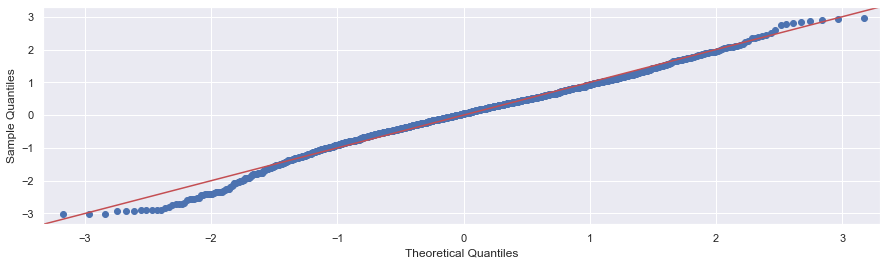

Statistics=0.989, p=0.000
Sample does not look Gaussian (reject H0)


<IPython.core.display.Javascript object>

In [159]:
from scipy import stats
from scipy.stats import shapiro

# NORMALITY #

model_residual = model6_fit.resid
model_y_adjusted = model6_fit.fittedvalues

sm.qqplot(model_residual, line="45", fit=True, dist=stats.norm)
plt.show()

# Shapiro-Wilk test
stat, p = shapiro(model_residual)
print("Statistics=%.3f, p=%.3f" % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

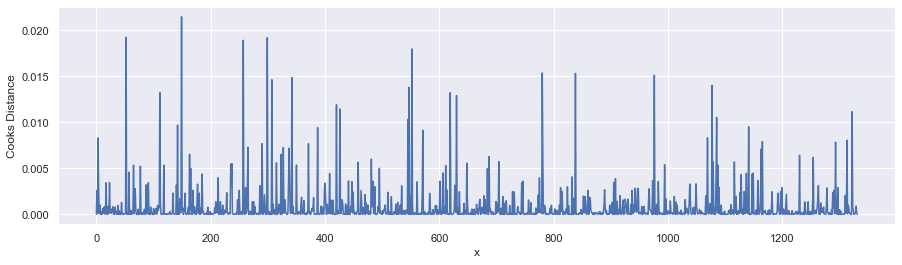

<IPython.core.display.Javascript object>

In [160]:
# Analysis for influent points

from statsmodels.graphics.regressionplots import *

influence = model6_fit.get_influence()

cooks = influence.cooks_distance
plt.plot(cooks[0])
plt.xlabel("x")
plt.ylabel("Cooks Distance")
plt.show()

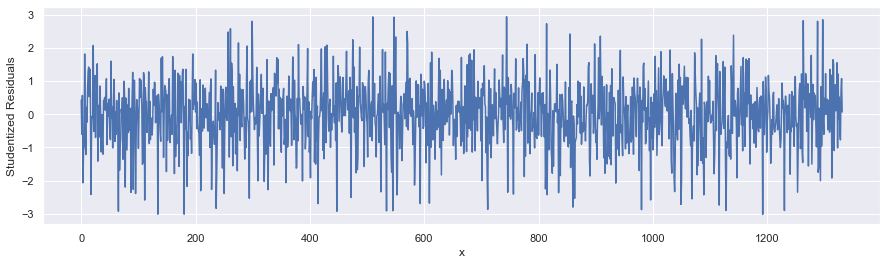

<IPython.core.display.Javascript object>

In [161]:
student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.xlabel("x")
plt.ylabel("Studentized Residuals")
plt.show()

In [162]:
np.where(student_resid < -3)

(array([ 134,  180, 1192], dtype=int64),)

<IPython.core.display.Javascript object>

In [163]:
np.where(student_resid > 3)

(array([], dtype=int64),)

<IPython.core.display.Javascript object>

In [164]:
XY_model6.iloc[[134, 180, 1192]]

AnoConstrucao  AreaPorao  AreaConstruida  AreaGaragem  Bairro_Crawfor  \
145        1.086471  -0.201746        0.426558    -0.437949               0   
193        1.086471  -0.201746        0.426558    -0.437949               0   
1304       1.086471  -0.186663        0.424480    -0.437949               0   

      Bairro_Timber  Bairro_NridgHt  Bairro_NoRidge  Bairro_BrDale  \
145               0               0               0              0   
193               0               0               0              0   
1304              0               0               0              0   

      Bairro_Veenker  Bairro_ClearCr  Bairro_StoneBr  Bairro_MeadowV  \
145                0               0               0               0   
193                0               0               0               0   
1304               0               0               0               0   

      log_PrecoVenda  
145         4.867534  
193         4.867534  
1304        4.867534

<IPython.core.display.Javascript object>

In [165]:
XY_model6 = XY_model6.drop(labels=[145, 193, 1304], axis=0,)

<IPython.core.display.Javascript object>

In [166]:
# MULTIPLE LINEAR REGRESSION MODEL
model6 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaPorao + AreaConstruida + AreaGaragem + Bairro_Crawfor + Bairro_Timber + Bairro_NridgHt + Bairro_NoRidge + Bairro_BrDale + Bairro_Veenker + Bairro_ClearCr + Bairro_StoneBr + Bairro_MeadowV",
    data=XY_model6,
)
model6_fit = model6.fit()
print(model6_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model6_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     679.5
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:24   Log-Likelihood:                 832.86
No. Observations:                1329   AIC:                            -1638.
Df Residuals:                    1315   BIC:                            -1565.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.1105      0.004   1248.

<IPython.core.display.Javascript object>

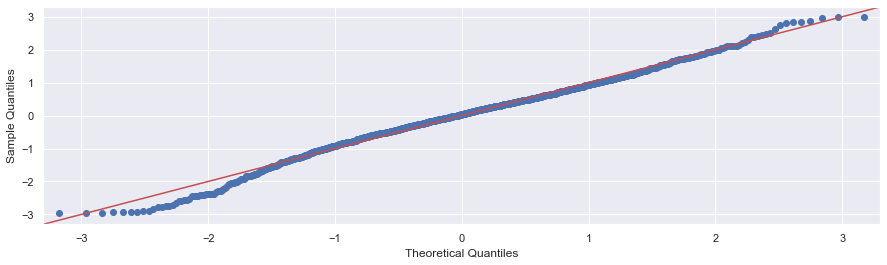

Statistics=0.991, p=0.000
Sample does not look Gaussian (reject H0)


<IPython.core.display.Javascript object>

In [167]:
from scipy import stats
from scipy.stats import shapiro

# NORMALITY #

model_residual = model6_fit.resid
model_y_adjusted = model6_fit.fittedvalues

sm.qqplot(model_residual, line="45", fit=True, dist=stats.norm)
plt.show()

# Shapiro-Wilk test
stat, p = shapiro(model_residual)
print("Statistics=%.3f, p=%.3f" % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

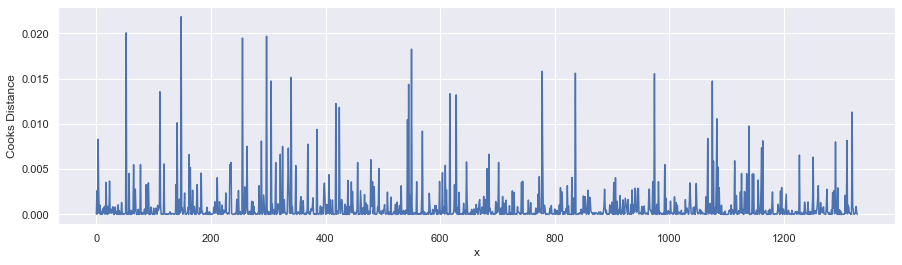

<IPython.core.display.Javascript object>

In [168]:
# Analysis for influent points

from statsmodels.graphics.regressionplots import *

influence = model6_fit.get_influence()

cooks = influence.cooks_distance
plt.plot(cooks[0])
plt.xlabel("x")
plt.ylabel("Cooks Distance")
plt.show()

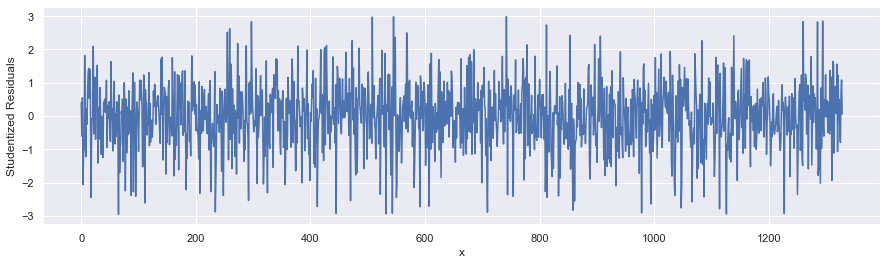

<IPython.core.display.Javascript object>

In [169]:
student_resid = influence.resid_studentized_internal
plt.plot(student_resid)
plt.xlabel("x")
plt.ylabel("Studentized Residuals")
plt.show()

In [170]:
np.where(student_resid < -3)

(array([], dtype=int64),)

<IPython.core.display.Javascript object>

In [171]:
np.where(student_resid > 3)

(array([], dtype=int64),)

<IPython.core.display.Javascript object>

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



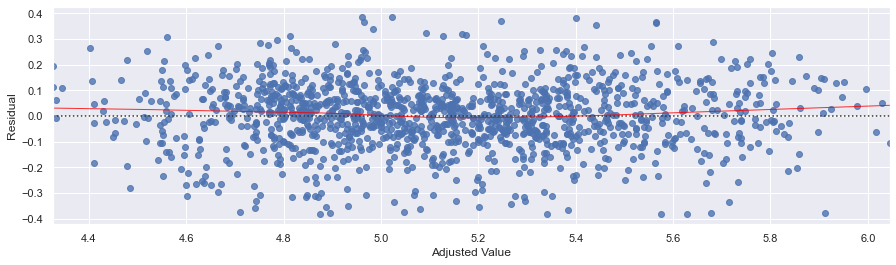

[('Breusch pagan statistic', 142.3847586986846), ('p-value', 6.99987127752921e-24)]

[('Goldfeld-Quandt - statistic', 0.9747798272101642), ('p-value', 0.6276339638704934)]

[('White’s statistic', 195.17398530813864), ('p-value', 1.7791736297829995e-16)]



<IPython.core.display.Javascript object>

In [172]:
# LINEARITY AND HOMOSCEDASTICITY PLOT

model_residual = model6_fit.resid
model_y_adjusted = model6_fit.fittedvalues
X = model6_fit.model.exog

sns.residplot(
    model_y_adjusted,
    model_residual,
    lowess=True,
    line_kws={"color": "red", "lw": 1, "alpha": 0.8},
)
plt.ylabel("Residual")
plt.xlabel("Adjusted Value")
plt.show()

# Heteroskedasticity tests

# Breush-Pagan test:

name = ["Breusch pagan statistic", "p-value"]
test = sms.het_breuschpagan(model_residual, X)
print(lzip(name, test))
print()

# Goldfeld-Quandt test

name = ["Goldfeld-Quandt - statistic", "p-value"]
test = sms.het_goldfeldquandt(model_residual, X)
print(lzip(name, test))
print()

# White’s Test
name = ["White’s statistic", "p-value"]
test = het_white(model_residual, X)
print(lzip(name, test))
print()

In [173]:
vif = pd.DataFrame()

vif["VIF Factor"] = [
    variance_inflation_factor(model6_fit.model.exog, i)
    for i in range(1, model6_fit.model.exog.shape[1])
]
vif["Variable"] = model6_fit.model.exog_names[1:]
print(vif)

    VIF Factor        Variable
0     1.480425   AnoConstrucao
1     1.502829       AreaPorao
2     1.426338  AreaConstruida
3     1.691058     AreaGaragem
4     1.068490  Bairro_Crawfor
5     1.056356   Bairro_Timber
6     1.213275  Bairro_NridgHt
7     1.138742  Bairro_NoRidge
8     1.026951   Bairro_BrDale
9     1.010430  Bairro_Veenker
10    1.026491  Bairro_ClearCr
11    1.038852  Bairro_StoneBr
12    1.030695  Bairro_MeadowV


<IPython.core.display.Javascript object>

For now, the best model in our case would be the model 6 from the trial #6 where:
the numeric variables were standardized;
the variable "Bairros" was transformed by one hot encoded;
the outliers influence was removed;
VIF is below 2.0;
Adjusted r-squared: 0.869;
model still presents heterocedasticity and no-normality of the residuals.

Y = Intercept + β1X1 + β2X2 + β3X3+ ... + βnXn

Y = 5.1105 + 0.1178xAnoConstrucao + 0.0857xAreaPorao + 0.1686xAreaConstruida + 0.0609xAreaGaragem + 0.2546xBairro_Crawfor + 0.0638xBairro_Timber + 0.1178xBairro_NridgHT + 0.0699xBairro_NoRidge - 0.1947xBairro_BrDale + 0.1892xBairro_Veenker + 0.1103xBairro_ClearCr + 0.1424xBairro_StoneBr - 0.2453xBairro_MeadowV

For each β, the unit for each variable implies in resulting the influence of the independent variable in the variable target: 10^(β)*1000

e.g. for variable AreaGaragem, the influence in the final price (y) is 10^(0.0609)*1000 = 1,150.53 for each unit of AreaGaragem.

## Validating the Model

In [174]:
# Spliting the dataset in train and test

from sklearn.model_selection import train_test_split

X = XY_model6.drop(["log_PrecoVenda"], axis=1)
X = sm.add_constant(X)

y = pd.DataFrame(XY_model6["log_PrecoVenda"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 977 to 1334
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   log_PrecoVenda  266 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB


<IPython.core.display.Javascript object>

In [175]:
# 6th trial model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import set_config

# MULTIPLE LINEAR REGRESSION MODEL
model6 = smf.ols(
    formula="log_PrecoVenda ~ AnoConstrucao + AreaPorao + AreaConstruida + AreaGaragem + Bairro_Crawfor + Bairro_Timber + Bairro_NridgHt + Bairro_NoRidge + Bairro_BrDale + Bairro_Veenker + Bairro_ClearCr + Bairro_StoneBr + Bairro_MeadowV",
    data=XY_model6,
)
model6_fit = model6.fit()
print(model6_fit.summary())

# PLOTING GRAPHS FOR THE ADJUSTED MODEL
p = model6_fit.params

                            OLS Regression Results                            
Dep. Variable:         log_PrecoVenda   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     679.5
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:25   Log-Likelihood:                 832.86
No. Observations:                1329   AIC:                            -1638.
Df Residuals:                    1315   BIC:                            -1565.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.1105      0.004   1248.

<IPython.core.display.Javascript object>

In [176]:
from sklearn.metrics import mean_squared_error, r2_score


def linear_reg_print(model, X_train, X_test, y_train, y_test, name):
    train_pred = model.predict(X_train)
    rmse_train = mean_squared_error(y_train, train_pred) ** 0.5
    r2_train = r2_score(y_train, train_pred)

    test_pred = model.predict(X_test)
    rmse_test = mean_squared_error(y_test, test_pred) ** 0.5
    r2_test = r2_score(y_test, test_pred)

    print(
        f"""***{name}***
    train
    RMSE: {round(rmse_train, 2)}
    R2: {round(r2_train, 2)}\n
    test
    RMSE: {round(rmse_test, 2)}
    R2: {round(r2_test, 2)}"""
    )

<IPython.core.display.Javascript object>

In [177]:
X_train.head()

const  AnoConstrucao  AreaPorao  AreaConstruida  AreaGaragem  \
924     1.0       0.289078   1.598147        0.378762     0.682635   
183     1.0       1.053246   0.783670        1.201686     0.064382   
1031    1.0      -1.704405  -0.568763        2.584915     0.972442   
496     1.0       0.687774   2.518203        2.584915     0.363848   
225     1.0      -0.009945  -1.056443       -0.419226    -0.920960   

      Bairro_Crawfor  Bairro_Timber  Bairro_NridgHt  Bairro_NoRidge  \
924                0              0               0               0   
183                0              0               0               0   
1031               0              0               0               0   
496                0              0               0               1   
225                0              0               0               0   

      Bairro_BrDale  Bairro_Veenker  Bairro_ClearCr  Bairro_StoneBr  \
924               0               0               0               0   
183               0               0               0               0   
1031              0               0               0               0   
496               0               0               0               0   
225               1               0               0               0   

      Bairro_MeadowV  
924                0  
183                0  
1031               0  
496                0  
225                0

<IPython.core.display.Javascript object>

In [178]:
rlm = LinearRegression()
rlm.fit(
    X_train[
        [
            "AnoConstrucao",
            "AreaPorao",
            "AreaGaragem",
            "AreaConstruida",
            "Bairro_Crawfor",
            "Bairro_Timber",
            "Bairro_NridgHt",
            "Bairro_NoRidge",
            "Bairro_BrDale",
            "Bairro_Veenker",
            "Bairro_ClearCr",
            "Bairro_StoneBr",
            "Bairro_MeadowV",
        ]
    ],
    y_train,
)

linear_reg_print(
    rlm,
    X_train[
        [
            "AnoConstrucao",
            "AreaPorao",
            "AreaGaragem",
            "AreaConstruida",
            "Bairro_Crawfor",
            "Bairro_Timber",
            "Bairro_NridgHt",
            "Bairro_NoRidge",
            "Bairro_BrDale",
            "Bairro_Veenker",
            "Bairro_ClearCr",
            "Bairro_StoneBr",
            "Bairro_MeadowV",
        ]
    ],
    X_test[
        [
            "AnoConstrucao",
            "AreaPorao",
            "AreaGaragem",
            "AreaConstruida",
            "Bairro_Crawfor",
            "Bairro_Timber",
            "Bairro_NridgHt",
            "Bairro_NoRidge",
            "Bairro_BrDale",
            "Bairro_Veenker",
            "Bairro_ClearCr",
            "Bairro_StoneBr",
            "Bairro_MeadowV",
        ]
    ],
    y_train,
    y_test,
    "Multiple Linear Regression",
)

***Multiple Linear Regression***
    train
    RMSE: 0.13
    R2: 0.88

    test
    RMSE: 0.13
    R2: 0.84


<IPython.core.display.Javascript object>

In [179]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

ypred = model6_fit.predict(
    X_test[
        [
            "AnoConstrucao",
            "AreaPorao",
            "AreaGaragem",
            "AreaConstruida",
            "Bairro_Crawfor",
            "Bairro_Timber",
            "Bairro_NridgHt",
            "Bairro_NoRidge",
            "Bairro_BrDale",
            "Bairro_Veenker",
            "Bairro_ClearCr",
            "Bairro_StoneBr",
            "Bairro_MeadowV",
        ]
    ]
)

# Metrics to evaluate your model
r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(
    mean_squared_error(y_test, ypred)
)

(0.8466969566588998, 0.09635441845252032, 0.12903045852794248)

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Predictions')

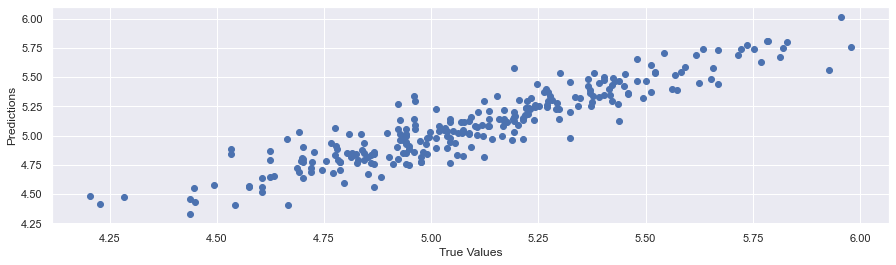

<IPython.core.display.Javascript object>

In [180]:
## The line / model
plt.scatter(y_test, ypred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

## Alternative Method - Predictive capacity, regression via random forest

In [181]:
# Stats libs
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os

# Modelling libs
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
    mean_absolute_error,
)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

# Feature importance
from sklearn.inspection import permutation_importance

# Categorical encoders
from category_encoders.target_encoder import TargetEncoder

from matplotlib.dates import DateFormatter

sns.set(font_scale=1.2, style="whitegrid")

<IPython.core.display.Javascript object>

In [182]:
data.head()

Id ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua Beco FormaProp  \
0   1           60         RL     65.0         8450  Pave  NaN       Reg   
1   2           20         RL     80.0         9600  Pave  NaN       Reg   
2   3           60         RL     68.0        11250  Pave  NaN       IR1   
3   4           70         RL     60.0         9550  Pave  NaN       IR1   
4   5           60         RL     84.0        14260  Pave  NaN       IR1   

  PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1 Estrada2  \
0       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm   
1       Lvl   AllPub        FR2            Gtl  Veenker    Feedr     Norm   
2       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm   
3       Lvl   AllPub     Corner            Gtl  Crawfor     Norm     Norm   
4       Lvl   AllPub        FR2            Gtl  NoRidge     Norm     Norm   

  TipoHabitacao EstiloHabitacao Qualidade Condicao  AnoConstrucao  AnoReforma  \
0          1Fam          2Story         7        5           2003        2003   
1          1Fam          1Story         6        8           1976        1976   
2          1Fam          2Story         7        5           2001        2002   
3          1Fam          2Story         7        5           1915        1970   
4          1Fam          2Story         8        5           2000        2000   

  TipoTelhado MaterialTelhado Exterior1 Exterior2 TipoAlvenaria  \
0       Gable         CompShg   VinylSd   VinylSd       BrkFace   
1       Gable         CompShg   MetalSd   MetalSd          None   
2       Gable         CompShg   VinylSd   VinylSd       BrkFace   
3       Gable         CompShg   Wd Sdng   Wd Shng          None   
4       Gable         CompShg   VinylSd   VinylSd       BrkFace   

   AreaAlvenaria QualidadeCobertura CondicaoExterna TipoFundacao AlturaPorao  \
0          196.0                 Gd              TA        PConc          Gd   
1            0.0                 TA              TA       CBlock          Gd   
2          162.0                 Gd              TA        PConc          Gd   
3            0.0                 TA              TA       BrkTil          TA   
4          350.0                 Gd              TA        PConc          Gd   

  CondicaoPorao ParedePorao TipoAcabPorao1  AreaAcabPorao1 TipoAcabPorao2  \
0            TA          No            GLQ             706            Unf   
1            TA          Gd            ALQ             978            Unf   
2            TA          Mn            GLQ             486            Unf   
3            Gd          No            ALQ             216            Unf   
4            TA          Av            GLQ             655            Unf   

   AreaAcabPorao2  AreaInacabPorao  AreaPorao Aquecimento  \
0               0              150        856        GasA   
1               0              284       1262        GasA   
2               0              434        920        GasA   
3               0              540        756        GasA   
4               0              490       1145        GasA   

  QualidadeAquecimento ArCentral InstalacaoEletrica  AreaTerreo  Area2Andar  \
0                   Ex         Y              SBrkr         856         854   
1                   Ex         Y              SBrkr        1262           0   
2                   Ex         Y              SBrkr         920         866   
3                   Gd         Y              SBrkr         961         756   
4                   Ex         Y              SBrkr        1145        1053   

   BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  Banheiro  \
0                   0            1710              1            0         2   
1                   0            1262              0            1         2   
2                   0            1786              1            0         2   
3                   0            1717              1            0         1   
4           

<IPython.core.display.Javascript object>

In [183]:
data.drop(["z_PrecoVenda"], axis=1, inplace=True)
data.head()

Id ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua Beco FormaProp  \
0   1           60         RL     65.0         8450  Pave  NaN       Reg   
1   2           20         RL     80.0         9600  Pave  NaN       Reg   
2   3           60         RL     68.0        11250  Pave  NaN       IR1   
3   4           70         RL     60.0         9550  Pave  NaN       IR1   
4   5           60         RL     84.0        14260  Pave  NaN       IR1   

  PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1 Estrada2  \
0       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm   
1       Lvl   AllPub        FR2            Gtl  Veenker    Feedr     Norm   
2       Lvl   AllPub     Inside            Gtl  CollgCr     Norm     Norm   
3       Lvl   AllPub     Corner            Gtl  Crawfor     Norm     Norm   
4       Lvl   AllPub        FR2            Gtl  NoRidge     Norm     Norm   

  TipoHabitacao EstiloHabitacao Qualidade Condicao  AnoConstrucao  AnoReforma  \
0          1Fam          2Story         7        5           2003        2003   
1          1Fam          1Story         6        8           1976        1976   
2          1Fam          2Story         7        5           2001        2002   
3          1Fam          2Story         7        5           1915        1970   
4          1Fam          2Story         8        5           2000        2000   

  TipoTelhado MaterialTelhado Exterior1 Exterior2 TipoAlvenaria  \
0       Gable         CompShg   VinylSd   VinylSd       BrkFace   
1       Gable         CompShg   MetalSd   MetalSd          None   
2       Gable         CompShg   VinylSd   VinylSd       BrkFace   
3       Gable         CompShg   Wd Sdng   Wd Shng          None   
4       Gable         CompShg   VinylSd   VinylSd       BrkFace   

   AreaAlvenaria QualidadeCobertura CondicaoExterna TipoFundacao AlturaPorao  \
0          196.0                 Gd              TA        PConc          Gd   
1            0.0                 TA              TA       CBlock          Gd   
2          162.0                 Gd              TA        PConc          Gd   
3            0.0                 TA              TA       BrkTil          TA   
4          350.0                 Gd              TA        PConc          Gd   

  CondicaoPorao ParedePorao TipoAcabPorao1  AreaAcabPorao1 TipoAcabPorao2  \
0            TA          No            GLQ             706            Unf   
1            TA          Gd            ALQ             978            Unf   
2            TA          Mn            GLQ             486            Unf   
3            Gd          No            ALQ             216            Unf   
4            TA          Av            GLQ             655            Unf   

   AreaAcabPorao2  AreaInacabPorao  AreaPorao Aquecimento  \
0               0              150        856        GasA   
1               0              284       1262        GasA   
2               0              434        920        GasA   
3               0              540        756        GasA   
4               0              490       1145        GasA   

  QualidadeAquecimento ArCentral InstalacaoEletrica  AreaTerreo  Area2Andar  \
0                   Ex         Y              SBrkr         856         854   
1                   Ex         Y              SBrkr        1262           0   
2                   Ex         Y              SBrkr         920         866   
3                   Gd         Y              SBrkr         961         756   
4                   Ex         Y              SBrkr        1145        1053   

   BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  Banheiro  \
0                   0            1710              1            0         2   
1                   0            1262              0            1         2   
2                   0            1786              1            0         2   
3                   0            1717              1            0         1   
4           

<IPython.core.display.Javascript object>

In [184]:
from typing import List, Tuple

# Function to create Datasets for training, validation and test
def train_test_valid_split(
    df: pd.DataFrame,
    features: list,
    target: str,
    test_size: float,
    valid_size: float,
    random_state: int,
) -> Tuple[np.array, np.array, np.array, np.array, np.array, np.array]:
    """Splits dataframe in training, testing and validation sets"""

    # The first train/test split
    (X_train, X_test, y_train, y_test) = train_test_split(
        df[features], df[target], test_size=test_size, random_state=random_state,
    )

    # The second train/test split
    (X_test, X_val, y_test, y_val) = train_test_split(
        X_test, y_test, test_size=valid_size, random_state=random_state
    )

    return X_train, X_test, X_val, y_train, y_test, y_val

<IPython.core.display.Javascript object>

In [185]:
# Splitting data in train, validation and test

df_rf = data.drop("log_PrecoVenda", axis=1)

target = "PrecoVenda"

features = df_rf.columns.tolist()
features.remove("PrecoVenda")

from sklearn.model_selection import train_test_split

(X_train, X_test, X_val, y_train, y_test, y_val) = train_test_valid_split(
    df_rf,
    features=features,
    target=target,
    test_size=0.3,
    valid_size=0.5,
    random_state=42,
)


print("X Train shape", X_train.shape)
print("X Val shape", X_val.shape)
print("X Test shape", X_test.shape)

X Train shape (1022, 80)
X Val shape (219, 80)
X Test shape (219, 80)


<IPython.core.display.Javascript object>

In [186]:
y_train.head()

135     174.0
1452    145.0
762     215.2
932     320.0
435     212.0
Name: PrecoVenda, dtype: float64

<IPython.core.display.Javascript object>

In [187]:
num_features = df_rf.select_dtypes(include=["int", "float"]).columns.tolist()
num_features.remove("PrecoVenda")
cat_features = df_rf.select_dtypes(exclude=["int", "float"]).columns.tolist()


def random_forest_preprocessing(X_train, X_val, X_test, y_train):

    # Categoricals pre-processing (missing imputer)
    cat_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
    X_val[cat_features] = cat_imputer.transform(X_val[cat_features])
    X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

    # Categoricals pre-processing (missing imputer)
    cat_imputer = SimpleImputer(missing_values=None, strategy="most_frequent")
    X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
    X_val[cat_features] = cat_imputer.transform(X_val[cat_features])
    X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

    # Categoricals pre-processing (categorical encoders)
    target_encoder = TargetEncoder()
    X_train[cat_features] = target_encoder.fit_transform(X_train[cat_features], y_train)
    X_val[cat_features] = target_encoder.transform(X_val[cat_features])
    X_test[cat_features] = target_encoder.transform(X_test[cat_features])

    # Numerical pre-processing (missing imputer)
    num_imputer = SimpleImputer(missing_values=np.nan, strategy="median")
    X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
    X_val[num_features] = num_imputer.transform(X_val[num_features])
    X_test[num_features] = num_imputer.transform(X_test[num_features])

    return X_train, X_val, X_test


X_train, X_val, X_test = random_forest_preprocessing(
    X_train.copy(), X_val.copy(), X_test.copy(), y_train
)

C:\Users\User\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning:

Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327

C:\Users\User\anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning:

Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327



<IPython.core.display.Javascript object>

#### Fitting a random forest baseline

In [188]:
from sklearn.ensemble import RandomForestRegressor
import math

# Metrics function
def metrics_report(y, y_pred, dataset_name="valid"):
    mean_y = np.mean(y)
    mean_pred = np.mean(y_pred)

    rmse = round(math.sqrt(mean_squared_error(y, y_pred)), 2)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)

    report = pd.DataFrame(
        {
            "metric": ["RMSE", "MAE", "R^2", "MAPE", "Avg. target", "Avg. Prediction"],
            dataset_name: [rmse, mae, r2, mape, mean_y, mean_pred],
        }
    )

    report[dataset_name] = report[dataset_name]
    return report


rf_baseline = RandomForestRegressor(random_state=42)
# Training
rf_baseline.fit(X_train, y_train)

y_val_baseline_pred = rf_baseline.predict(X_val)
baseline_report = metrics_report(y_val, y_val_baseline_pred, "validation")
baseline_report

metric  validation
0             RMSE   28.570000
1              MAE   16.716103
2              R^2    0.892755
3             MAPE    0.093441
4      Avg. target  174.313753
5  Avg. Prediction  171.322197

<IPython.core.display.Javascript object>

#### Finding the best hyperparameters for the Random Forest

In [189]:
# hiperparams: n_estimators: [], max_features: [], min_samples_leaf: []
for n_estimators in [10, 30, 50, 70, 100, 150, 200]:
    print(f"Random forest, with n_estimators {n_estimators}")
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)
    y_val_pred = rf_model.predict(X_val)
    rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f"rmse: {rmse}\n")

Random forest, with n_estimators 10
rmse: 29.555493019842118

Random forest, with n_estimators 30
rmse: 29.259854242302136

Random forest, with n_estimators 50
rmse: 29.087328955209053

Random forest, with n_estimators 70
rmse: 28.62150778585666

Random forest, with n_estimators 100
rmse: 28.568636133657403

Random forest, with n_estimators 150
rmse: 28.390468445890694

Random forest, with n_estimators 200
rmse: 28.83594465597267



<IPython.core.display.Javascript object>

In [190]:
# hiperparams: n_estimators: [150], max_features: [], min_samples_leaf: []
for max_features in ["sqrt", 0.1, 0.2, 0.3, 0.4, 0.6]:
    print(f"Random forest, with max_features {max_features}")
    rf_model = RandomForestRegressor(
        n_estimators=150, max_features=max_features, random_state=42
    )
    rf_model.fit(X_train, y_train)
    y_val_pred = rf_model.predict(X_val)
    rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f"rmse: {rmse}\n")

Random forest, with max_features sqrt
rmse: 30.464182290022475

Random forest, with max_features 0.1
rmse: 30.464182290022475

Random forest, with max_features 0.2
rmse: 28.415162838295153

Random forest, with max_features 0.3
rmse: 28.582844971302098

Random forest, with max_features 0.4
rmse: 28.53083876342725

Random forest, with max_features 0.6
rmse: 28.06428793917695



<IPython.core.display.Javascript object>

In [191]:
# hiperparams: n_estimators: [150], max_features: [0.3], min_samples_leaf: []
for min_samples_leaf in list(range(1, 6)):
    print(f"Random forest, with min_samples_leaf {min_samples_leaf}")
    rf_model = RandomForestRegressor(
        n_estimators=150,
        max_features=0.3,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
    )
    rf_model.fit(X_train, y_train)
    y_val_pred = rf_model.predict(X_val)
    rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f"rmse: {rmse}\n")

Random forest, with min_samples_leaf 1
rmse: 28.582844971302098

Random forest, with min_samples_leaf 2
rmse: 28.93895186885274

Random forest, with min_samples_leaf 3
rmse: 30.126371126619347

Random forest, with min_samples_leaf 4
rmse: 30.960960554530537

Random forest, with min_samples_leaf 5
rmse: 32.323776867782854



<IPython.core.display.Javascript object>

#### Random Forest with the best hyperparameters

In [192]:
# hiperparams: n_estimators: [150], max_features: [0.6], min_samples_leaf: [1]
rf_model = RandomForestRegressor(
    n_estimators=150, max_features=0.3, min_samples_leaf=1, random_state=42
)
rf_model.fit(X_train, y_train)
y_val_pred = rf_model.predict(X_val)
metrics_report(y_val, y_val_pred, "validation")

metric  validation
0             RMSE   28.580000
1              MAE   16.239359
2              R^2    0.892649
3             MAPE    0.091892
4      Avg. target  174.313753
5  Avg. Prediction  172.035391

<IPython.core.display.Javascript object>

 #### Importance of the features, removing less important variables

In [193]:
# https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html
print("Running permutation feature importance")
permutation_result = permutation_importance(
    rf_model, X_val, y_val, n_repeats=5, random_state=42
)

Running permutation feature importance


<IPython.core.display.Javascript object>

Plotting permutation feature importance

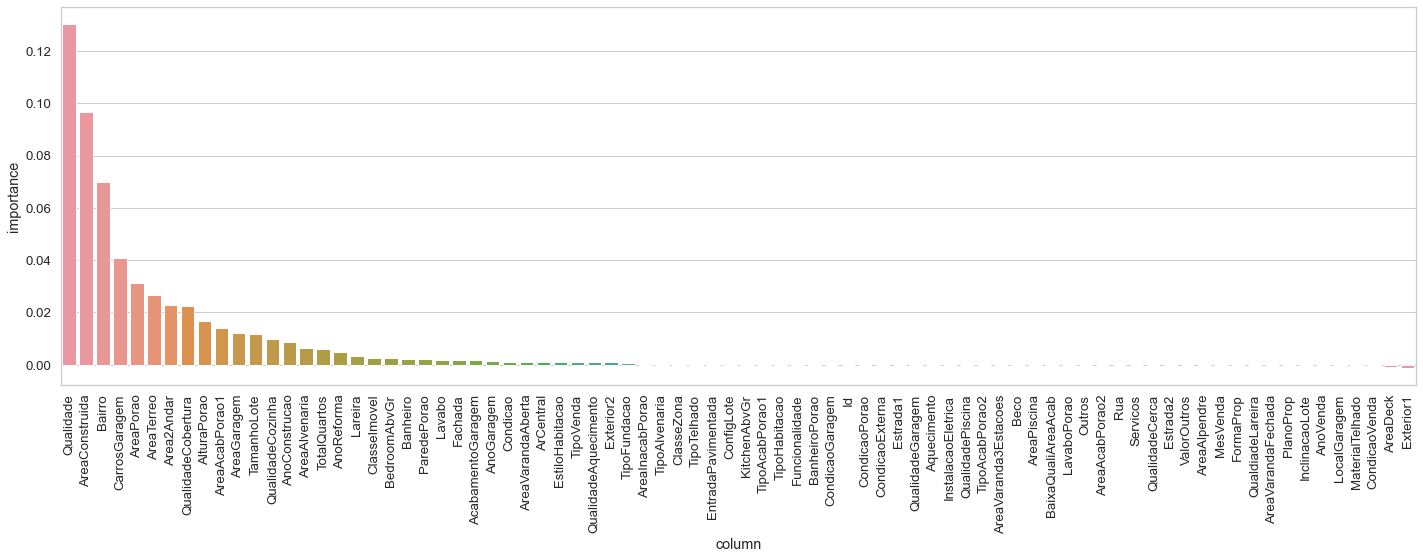

<IPython.core.display.Javascript object>

In [194]:
importances = pd.DataFrame(
    {"column": X_val.columns, "importance": permutation_result.importances_mean}
)
importances.sort_values(by="importance", ascending=False, inplace=True)

fig, axs = plt.subplots(figsize=(20, 8))
ax = sns.barplot(x="column", y="importance", data=importances)
plt.xticks(rotation=90)
plt.tight_layout()

In [196]:
# Getting the top 25 best features
best_features = importances.head(25).column.tolist()
print(best_features)

['Qualidade', 'AreaConstruida', 'Bairro', 'CarrosGaragem', 'AreaPorao', 'AreaTerreo', 'Area2Andar', 'QualidadeCobertura', 'AlturaPorao', 'AreaAcabPorao1', 'AreaGaragem', 'TamanhoLote', 'QualidadeCozinha', 'AnoConstrucao', 'AreaAlvenaria', 'TotalQuartos', 'AnoReforma', 'Lareira', 'ClasseImovel', 'BedroomAbvGr', 'Banheiro', 'ParedePorao', 'Lavabo', 'Fachada', 'AcabamentoGaragem']


<IPython.core.display.Javascript object>

In [197]:
# Fitting the final RandomForest model
rf_model = RandomForestRegressor(
    n_estimators=150, max_features=0.6, min_samples_leaf=1, random_state=42
)
rf_model.fit(X_train[best_features], y_train)

# Computing predictions
y_train_pred = rf_model.predict(X_train[best_features])
y_val_pred = rf_model.predict(X_val[best_features])
y_test_pred = rf_model.predict(X_test[best_features])

# Computing the train, validation and test model performance metrics
train_report = metrics_report(y_train, y_train_pred, "train")
val_report = metrics_report(y_val, y_val_pred, "validation")
test_report = metrics_report(y_test, y_test_pred, "test")

final_report = pd.concat(
    [train_report, val_report[["validation"]], test_report[["test"]]], axis=1
)

print(f"Baseline report (total features: {len(features)})")
print(baseline_report)
print("")
print(f"Final report (total features: {len(best_features)})")
print(final_report)

Baseline report (total features: 80)
            metric  validation
0             RMSE   28.570000
1              MAE   16.716103
2              R^2    0.892755
3             MAPE    0.093441
4      Avg. target  174.313753
5  Avg. Prediction  171.322197

Final report (total features: 25)
            metric       train  validation        test
0             RMSE   11.660000   26.430000   22.850000
1              MAE    6.570955   15.890369   15.138021
2              R^2    0.977426    0.908214    0.916858
3             MAPE    0.038669    0.092855    0.100709
4      Avg. target  181.312693  174.313753  185.701653
5  Avg. Prediction  181.031922  171.934971  185.510219


<IPython.core.display.Javascript object>

#### Importance of the features in the final model

Running permutation feature importance with the final model on the held-out testing set


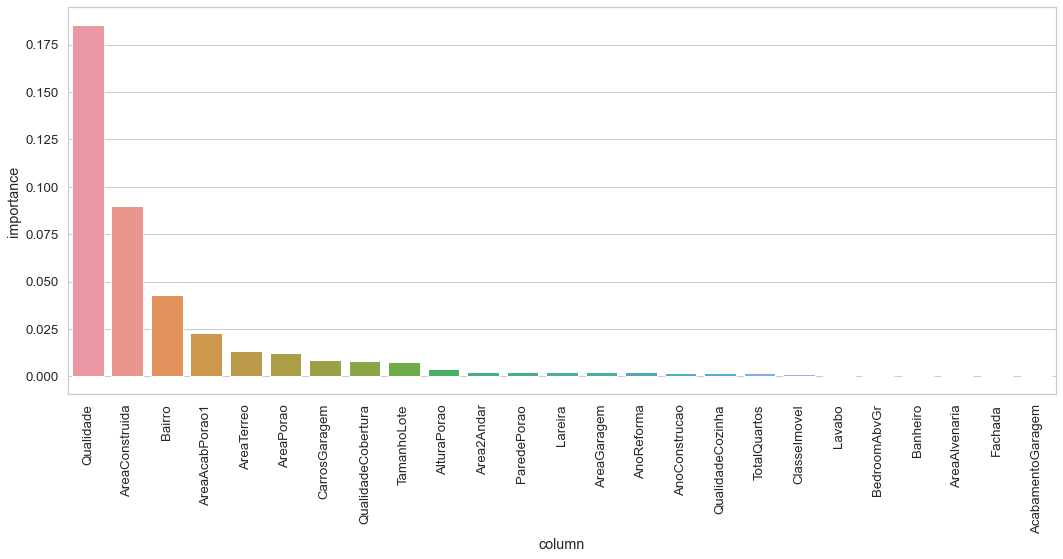

<IPython.core.display.Javascript object>

In [198]:
print(
    "Running permutation feature importance with the final model on the held-out testing set"
)
permutation_result = permutation_importance(
    rf_model, X_test[best_features], y_test, n_repeats=5, random_state=42
)

importances = pd.DataFrame(
    {
        "column": X_test[best_features].columns,
        "importance": permutation_result.importances_mean,
    }
)
importances.sort_values(by="importance", ascending=False, inplace=True)

fig, axs = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x="column", y="importance", data=importances)
plt.xticks(rotation=90)
plt.tight_layout()